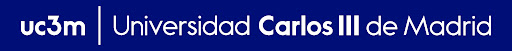
# Aprendizaje automático.
# Práctica 1. PREDICCIÓN DE LA PRODUCCIÓN DE ENERGÍA SOLAR
Grupo 29
* Pablo Salcedo 100408773. 
* Jorge Sousa 100408805.



# 1. INTRODUCCIÓN
* En esta primera práctica vamos a construir un modelo de predicción para la producción de energía solar.
* Vamos a usar diferentes modelos de aprendizaje y ajuste de hiperparámetros para encontrar el tipo de aprendizaje más adecuado y usando un conjunto de datos inicial, entrenaremos a nuestro modelo para que en el apartado final pueda realizar predicciones de la forma más precisa posible sobre otro conjunto de datos. 
* El conjunto de datos escogido por nuestro grupo es el 29, correspondiente al número de grupo, al igual que la semilla que usaremos en cada método.
* Para hacer la práctica realizaremos diferentes apartados:
  - Imports y funciones.
  - Lectura de datos.
  - Análisis exploratorio de ambos conjunto de datos(EDA).
  - Preparación de datos.
  - Modelo Dummy.
  - Métodos básicos.
  * Reucción de dimensionalidad.
  - Métodos avanzados.
  - Modelo final.

#  2. IMPORTS Y FUNCIONES QUE USAREMOS EN LA PRÁCTICA

In [45]:
#Si no está instalado debemos instalarlo primero
!pip install --upgrade linear-tree
!pip install seaborn

!pip install git+https://github.com/scikit-optimize/scikit-optimize.git #skopt


#IMPORTS PARA TRATAMIENTO DE DATOS
import os
import numpy as np
import pandas as pd
from google.colab import drive


#SKLEARN
from sklearn import tree
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn import preprocessing
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import PredefinedSplit
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, KFold, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC, SVR
from sklearn.utils.fixes import loguniform
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVR
from sklearn.ensemble import HistGradientBoostingRegressor


#SCIPY
from scipy.stats import sem
from scipy.stats import uniform, expon
from scipy.stats import randint as sp_randint
from scipy.stats import uniform, expon
from scipy.stats import pearsonr
import scipy.stats as stats


#SKOPT
from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical
from skopt.plots import plot_objective, plot_histogram, plot_convergence


# Configuración de warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
# ==============================================================================


# OTROS IMPORTS
import joblib
import time
from joblib import dump, load
from pprint import pprint
from statsmodels.stats.proportion import proportion_confint
import matplotlib.pyplot as plt
from lineartree import LinearTreeRegressor
import seaborn as sns
from matplotlib import style
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
from mlxtend.plotting import plot_decision_regions



#FUNCIONES QUE NECESITAREMOS

#CALCULAR EL RMSE
def rmse(y_test, y_test_pred): 
  return np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

#FUNCION PARA MOSTRAR LA REGRESIÓN POR PANTALLA
def pintaResultados (reg, n):
  plt.subplots(figsize=(30, 5))
  x = np.arange(Y_test[:n].size)
  pred = reg.predict(X=X_test)
  plt.plot(x, Y_test[:n], 'b.', x, pred[:n], 'g^')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/scikit-optimize/scikit-optimize.git to /tmp/pip-req-build-vm5y_v5m
  Running command git clone --filter=blob:none --quiet https://github.com/scikit-optimize/scikit-optimize.git /tmp/pip-req-build-vm5y_v5m
  Resolved https://github.com/scikit-optimize/scikit-optimize.git to commit a2369ddbc332d16d8ff173b12404b03fea472492
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# 3. LECTURA DE DATOS

In [46]:
#DATOS INICIALES

#semilla_datos_aleatorios con el número del grupo
np.random.seed(29)

drive.mount('/content/gdrive')
#os.chdir("/content/gdrive/MyDrive/PRACTICAS APRENDIZAJE AUTOMATICO/PRACTICA 1/Grupo29-Practica1")
#datos_disp = pd.read_csv("disp_st29ns1.txt.bz2", compression="bz2", index_col=0)
#datos_comp = pd.read_csv("comp_st29ns1.txt.bz2", compression="bz2", index_col=0)

#Estos datos los usaremos para crear el modelo, lo entrenaremos y con las conclusiones obtenidas sacaremos un modelo final.
datos_disp = pd.read_csv("disp_st29ns1.txt.bz2", compression="bz2", index_col=0)

#Estos datos los usaremos sobre el modelo final.
datos_comp = pd.read_csv("comp_st29ns1.txt.bz2", compression="bz2", index_col=0)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 4. ANÁLISIS EXPLORATORIO DE LOS DATOS (EDA)

## 4.1 ANÁLISIS DEL CONJUNTO datos_disp

In [47]:
print('======================================')
print('Las dimensiones de la tabla son:')
print(datos_disp.shape)
print('===============================')
print()

print('======================================')
print('Los tipos de atributos son:')
datos_disp.info()
print('================================')
print()

print('======================================')
print('Cuantos valores pérdidos por atributo:')
print(datos_disp.isnull().sum())
print('======================================')
print()

print('======================================')
print('Porcentaje de valores pérdidos por atributo:')
print(datos_disp.isnull().mean())
print('======================================')
print()

print('======================================')
print('Nombre de columnas:')
print(datos_disp.columns)
print('======================================')
print()

print('======================================')
print('Descripción de los datos:')
print(datos_disp.describe())
print('======================================')
print()


Las dimensiones de la tabla son:
(4380, 76)

Los tipos de atributos son:
<class 'pandas.core.frame.DataFrame'>
Index: 4380 entries, V1 to V4380
Data columns (total 76 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   apcp_sf1_1  4380 non-null   float64
 1   apcp_sf2_1  4380 non-null   float64
 2   apcp_sf3_1  4380 non-null   float64
 3   apcp_sf4_1  4380 non-null   float64
 4   apcp_sf5_1  4380 non-null   float64
 5   dlwrf_s1_1  4380 non-null   float64
 6   dlwrf_s2_1  4380 non-null   float64
 7   dlwrf_s3_1  4380 non-null   float64
 8   dlwrf_s4_1  4380 non-null   float64
 9   dlwrf_s5_1  4380 non-null   float64
 10  dswrf_s1_1  4380 non-null   float64
 11  dswrf_s2_1  4380 non-null   float64
 12  dswrf_s3_1  4380 non-null   float64
 13  dswrf_s4_1  4380 non-null   float64
 14  dswrf_s5_1  4380 non-null   float64
 15  pres_ms1_1  4380 non-null   float64
 16  pres_ms2_1  4380 non-null   float64
 17  pres_ms3_1  4380 non-null   float64
 18

### CONCLUSIONES SOBRE EL CONJUNTO datos_disp
Viendo los resultados obtenidos podemos sacar las siguientes conclusiones:
* El conjunto está formado por 4380 filas, correspondiendose cada una a cada dia de los 12 años de datos, y 76 columnas, incluida la Salida, correspondientes a cada parámetro de entrada.
* Todos los datos de entrada son de tipo float y la salida es un entero.
* Observando los valores de min y max de los diferentes atributos podemos concluir que no están normalizados.
* No hay datos nulos, es decir no falta ningún dato.
* El conjunto de datos está dividido en 16 subconjuntos:
  * ***apcp_sfc***: Acumulación de precipitacón en las últimas 3 horas.
  * ***dlwrf_sfc***: Media del flujo radiativo de largo alcance descendente que impacta en la superficie.
  * ***dswrf_sfc***: Media del flujo radiativo de corto alcance descendente que impacta en la superficie.
  * ***pres_msi***: Presión atmosférica en el nivel del mar.
  * ***pwat_eatm***: Agua precipitable sobre toda la profundidad de la superficie.
  * ***spfh_2m***: Humedad especifíca a 2 metros sobre la superficie.  
  * ***tcdc_eatm***: Nubosidad que hay sobre la profundidad de la superficie. 
  * ***tcolc_eatm***: Condensidad sobre la atmosfera.
  * ***tmax_2m***: Temperatura máxima de las 3 últimas horas a 2 metros sobre el nivel del mar. 
  * ***tmin_2m***: Temperatura mínima de las 3 últimas horas a 2 metros sobre el nivel del mar.
  * ***tmp_2m***: Temperatura actual a 2 metros sobre el nivel del mar. 
  * ***tmp_sfc***: Temperatura de la superficie.
  * ***ulwrf_sfc***: Media del flujo radiativo de largo alcance ascendente que impacta en la superficie.
  * ***ulwrf_tatm***: Media del flujo radiativo de largo alcance ascendente que impacta en la atmósfera. 
  * ***uswrf_sfc***: Media del flujo radiativo de corto alcance ascendente que impacta en la superficie.
  * ***Salida***: Energía solar acumulada durante el dia correspondiente.




In [48]:
#MATRIZ DE CORRELACION
correlacion=datos_disp.corr(method='pearson')
plt.figure(figsize=(76,76))
sns.heatmap(correlacion, annot=True)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Análisis de la matriz de correlación:
* Los colores mas claros indican una correlación cercana a 1 y los más oscuros indican una correlación cercana a -1.
* Los colores más cercanos al naranja indican correlaciones cercanas a 0

  - Vemos que las variables con ás correlación son las de los grupos 'dswrf_sfc' y 'uswrf_sfc'. También vemos alta correlación positiva entre 'spfh_2m' y 'tmax_2m' y con 'tmin_2m'.
  - Y con relación al datos que más nos interesa que es la salida, vemos que los atributos con mas correlación son:
      - dswrf_scf y uswrf_scf. Estas son las que mayor correlación positiva tienen, con valores superiores al 0'8.
      - En cuanto a correlación negativa son 'tcdc_eatm' y 'tcolc_eatm' pero no tienen valores muy altos como las anteriores, sino que se quedan alrededor del -0'4.

In [49]:
# Encontramos el q1, q3, y el rango intercuartílico para cada columna
q1, q3 = np.percentile(datos_disp,[25,75])
rango_cuartiles = q3 - q1

datos_atipicos = datos_disp[~((datos_disp < (q1-1.5*rango_cuartiles)) | (datos_disp > (q3+1.5*rango_cuartiles))).any(axis=1)]
# Calculamos cuantas filas desaparecerian
datos_atipicos.shape

(0, 76)

Vemos que analizando los datos usando el método del rango intercualítico, observamos que no hay datos atípicos, por lo tanto no debemos eliminar ninguna fila. 
Con esto termina nuestro análisis exploratorio del conjunto de datos_disp.

## 4.2 ANÁLISIS DEL CONJUNTO datos_comp

In [50]:
print('Las dimensiones de la tabla son:')
print(datos_comp.shape)
print('=====================================================================')
print()

print('Los tipos de atributos son:')
datos_comp.info()
print('======================================================================')
print()

print('Cuantos valores pérdidos por atributo:')
print(datos_comp.isnull().sum())
print('============================================================================')
print()

print('Porcentaje de valores pérdidos por atributo:')
print(datos_comp.isnull().mean())
print('============================================================================')
print()

print('Nombre de columnas:')
print(datos_comp.columns)
print('============================================================================')
print()

print('Descripción de los datos:')
print(datos_comp.describe())
print('============================================================================')
print()


Las dimensiones de la tabla son:
(733, 75)

Los tipos de atributos son:
<class 'pandas.core.frame.DataFrame'>
Index: 733 entries, V4381 to V5113
Data columns (total 75 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   apcp_sf1_1  733 non-null    float64
 1   apcp_sf2_1  733 non-null    float64
 2   apcp_sf3_1  733 non-null    float64
 3   apcp_sf4_1  733 non-null    float64
 4   apcp_sf5_1  733 non-null    float64
 5   dlwrf_s1_1  733 non-null    float64
 6   dlwrf_s2_1  733 non-null    float64
 7   dlwrf_s3_1  733 non-null    float64
 8   dlwrf_s4_1  733 non-null    float64
 9   dlwrf_s5_1  733 non-null    float64
 10  dswrf_s1_1  733 non-null    float64
 11  dswrf_s2_1  733 non-null    float64
 12  dswrf_s3_1  733 non-null    float64
 13  dswrf_s4_1  733 non-null    float64
 14  dswrf_s5_1  733 non-null    float64
 15  pres_ms1_1  733 non-null    float64
 16  pres_ms2_1  733 non-null    float64
 17  pres_ms3_1  733 non-null    float64
 1

### CONCLUSIONES SOBRE EL CONJUNTO datos_comp
Viendo los resultados obtenidos podemos sacar las siguientes conclusiones:
* El conjunto está formado por 733 filas, correspondiendose cada una a cada dia de los 2 años de datos, y 75 columnas ya que no hay atributo Salida en este conjunto, correspondientes a cada parámetro de entrada.
* Todos los datos de entrada son de tipo float.
* Observando los valores de min y max de los diferentes atributos podemos concluir que no están normalizados.
* No hay datos nulos, es decir no falta ningún dato.
* El conjunto de datos está dividido en 16 subconjuntos. Son los mismos atributos que el fichero datos_disp, por lo que no vamos a definirlos otra vez.

In [51]:
# Encontramos el q1, q3, y el rango intercuartílico para cada columna
q1, q3 = np.percentile(datos_comp,[25,75])
rango_cuartiles = q3 - q1

datos_atipicos = datos_comp[~((datos_comp < (q1-1.5*rango_cuartiles)) | (datos_comp > (q3+1.5*rango_cuartiles))).any(axis=1)]
# Calculamos cuantas filas desaparecerian
datos_atipicos.shape

(0, 75)

Vemos que en este conjunto tampoco hay datos atípicos, por lo tanto no debemos eliminar ninguna instancia ni columna.

# 5. PREPARACIÓN Y TRATAMIENTO DE LOS DATOS

* Aquí vamos a dividir los datos dispoibles en 2 conjuntos:
 - Train: Cogeremos los 10 primeros años. Lo emplearemos para evaluar distintos métodos y escoger el mejor. Son las primeras 3650 instancias.
 - Test: Cogeremos los 2 últimos años. Lo usaremos para entrenar el modelo final. Son las últimas 730 instancias.
 
* Después de eso vamos a normalizar ambos subconjuntos y después dividiremos otra vez el conjunto de entrenamiento para obtener otro conjunto de validación.
* También normalizaremos los datos de entrada.

In [52]:
#DIVISIÓN DE DATOS EN TRAIN Y TEST
train = datos_disp.iloc[0:3650] # CONJUNTO DE TRAIN
test = datos_disp.iloc[3650:4380] # CONJUNTO DE TEST

scaler = MinMaxScaler()

train_normalizado = pd.DataFrame(scaler.fit_transform(train),columns=datos_disp.columns)
test_normalizado = pd.DataFrame(scaler.fit_transform(test),columns=datos_disp.columns)

X_train = train_normalizado.iloc[:,:-1]
X_test = test_normalizado.iloc[:,:-1]             

Y_train = train.iloc[:,-1]
Y_test = test.iloc[:,-1]
#SOLAMENTE NORMALIZAMOS LOS DATOS DE ENTRADA PARA PODER COMPARAR LAS SALIDAS OBTENIDAS CON LAS REALES MÁS FÁCILMENTE

train_indices = np.full((2920,), -1, dtype=int) # 8 years
val_indices = np.full((730,), 0, dtype=int) # 2 years
test_fold = np.append(train_indices, val_indices)

# 6. MÉTODOS BÁSICOS
# CREACIÓN, EVALUACIÓN Y ANÁLISIS DE LOS MODELOS
Usaremos los siguientes métodos:
 - KNN
 - Árboles de regresión
 - Regresión lineal

* Las métricas que vamos a emplear para evaluar los modelos son las siguientes:
 - Raíz del error cuadrático medio(RMSE): El cual obtendremos de la siguiente manera: 
    - rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)).

 - Error absoluto medio(MAE): El cual obtendremos de la siguiente manera: 
    - mae = metrics.mean_absolute_error(Y_test, y_test_pred)

 - Tiempo de ejecución: Lo calcularemos usando la función time.

## MODELO DUMMY
  - Creamos un modelo base muy básico para obtener un error muy alto para observar la mejora con los distintos métodos.

In [53]:
modelo_dummy = DummyRegressor(strategy = "mean")

t_inicio = time.time() #INICIO EJECUCIÓN


modelo_dummy.fit(X_train,Y_train)
y_test_pred_dummy = modelo_dummy.predict(X_test)

t_fin = time.time() #FIN EJECUCIÓN
t_ejecución = t_fin - t_inicio #CALCULAMOS EL TIEMPO TOTAL DE EJECUCIÓN
print(f"El tiempo de ejecución de este modelo Dummy es: {t_ejecución}")

rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred_dummy)) #CALCULAMOS EL RMSE
print(f"El RMSE de este modelo Dummy es: {rmse}")

mae = metrics.mean_absolute_error(Y_test, y_test_pred_dummy) #CALCULAMOS EL MAE
print(f"El MAE de este modelo Dummy es: {mae}")


El tiempo de ejecución de este modelo Dummy es: 0.0013003349304199219
El RMSE de este modelo Dummy es: 7444245.5762022445
El MAE de este modelo Dummy es: 6279620.433327079


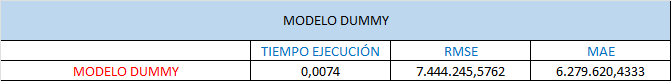

* Vemos que es un modelo que se ejcuta muy rápido pero obtenemos unos errores muy altos por lo que va a ser bastante fácil ver mejoras con los distintos modelos.

## 6.1 KNN

* El modelo KNN es un modelo no paramétrico que hace predcciones sobre la clasificación de un punto en base a la distancia a los puntos más cercanos.
* Se observan los K vecinos más cercanos al punto que queremos clasificar y se le asigna a la clase mayoritaria de entre los más cercanos.
 - En este caso vamos a estudiar dos modelos diferentes, uno con hiperparámetros por defecto y otro con ajuste de hiperparámetros.


### EVALUACIÓN CON HIPERPARÁMETROS POR OMISIÓN

In [54]:
#LLAMAMOS AL REGRESOR KNN
regresion_knn = KNeighborsRegressor()
np.random.seed(29) #SEMILLA CORRESPONDIENTE AL GRUPO
t_inicio = time.time() #INICIO EJECUCIÓN

regresion_knn.fit(X_train, Y_train) #CREAMOS EL ARBOL LINEAL

#OBTENEMOS LA PREDICCIÓN
y_test_pred = regresion_knn.predict(X_test)

t_fin = time.time() #FIN EJECUCIÓN
t_ejecución = t_fin - t_inicio #CALCULAMOS EL TIEMPO TOTAL DE EJECUCIÓN
print(f"El tiempo de ejecución de este modelo KNN es: {t_ejecución}")

rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)) #CALCULAMOS EL RMSE
print(f"El RMSE de este modelo KNN es: {rmse}")

mae = metrics.mean_absolute_error(Y_test, y_test_pred) #CALCULAMOS EL MAE
print(f"El MAE de este modelo KNN es: {mae}")


print(f"Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: ")
print(np.hstack((y_test_pred[:5,np.newaxis], Y_test[:5,np.newaxis])))

El tiempo de ejecución de este modelo KNN es: 0.11869454383850098
El RMSE de este modelo KNN es: 3642273.1238817377
El MAE de este modelo KNN es: 2563509.205479452
Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: 
[[12589200. 12672900.]
 [13141620.  9417900.]
 [ 2820600.  1773000.]
 [ 5341800.  7792200.]
 [ 9163440.  2965500.]]


### AJUSTE DE HIPERPARÁMETROS

In [55]:
#LLAMAMOS AL REGRESOR KNN
regresion_knn = KNeighborsRegressor(n_neighbors=50)
np.random.seed(29) #SEMILLA CORRESPONDIENTE AL GRUPO
t_inicio = time.time() #INICIO EJECUCIÓN

regresion_knn.fit(X_train, Y_train) #CREAMOS EL ARBOL LINEAL

#OBTENEMOS LA PREDICCIÓN
y_test_pred = regresion_knn.predict(X_test)

t_fin = time.time() #FIN EJECUCIÓN
t_ejecución = t_fin - t_inicio #CALCULAMOS EL TIEMPO TOTAL DE EJECUCIÓN
print(f"El tiempo de ejecución de este modelo KNN es: {t_ejecución}")

rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)) #CALCULAMOS EL RMSE
print(f"El RMSE de este modelo KNN es: {rmse}")

mae = metrics.mean_absolute_error(Y_test, y_test_pred) #CALCULAMOS EL MAE
print(f"El MAE de este modelo KNN es: {mae}")


print(f"Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: ")
print(np.hstack((y_test_pred[:5,np.newaxis], Y_test[:5,np.newaxis])))

El tiempo de ejecución de este modelo KNN es: 0.11514472961425781
El RMSE de este modelo KNN es: 3528295.2199361203
El MAE de este modelo KNN es: 2474839.5616438356
Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: 
[[13015218. 12672900.]
 [12557382.  9417900.]
 [ 4497420.  1773000.]
 [ 7735896.  7792200.]
 [ 9445050.  2965500.]]


## CONCLUSIONES KNN

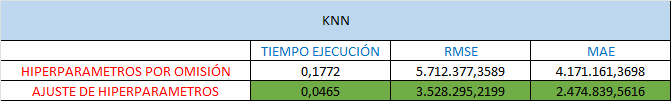
* Podemos observar que el modelo con ajuste de hiperparámetros es mejor que el modelo sin ajuste en los 3 indicadores que estamos analizando, por lo que podemos concluir que en la regresión KNN este es el mejor modelo.

## 6.2 ÁRBOLES DE REGRESIÓN

 - Vamos a realizar 2 tipos de análisis sin ajuste de hiperparámetros diferentes, lineal y no lineal. El lineal lo vamos a dejar comentado ya que tarda mcuho en ejecutar y además el no lineal, tiene errores más pequeños.
 - Luego veremos diferentes modelos modificando los hiperparámetros. Los hiperparámetros que vamos a modificar en estos métodos son:
    - min_samples_split: número mínimo de instancias que debe de tener un nodo interno para ser
subdividido.
    - max_depth: máxima profundidad del árbol.

- Los métodos que usaremos son:
    - GridSearch
    - Randomized Search
    - Bayes Search


### EVALUACIÓN CON HIPERPARÁMETROS POR OMISIÓN

#### LINEAL

In [56]:
'''
#LLAMAMOS EL ÁRBOL LINEAL
arbol_lineal = LinearTreeRegressor(base_estimator=LinearRegression())
np.random.seed(29) #SEMILLA CORRESPONDIENTE AL GRUPO
t_inicio = time.time() #INICIO EJECUCIÓN

arbol_lineal.fit(X_train, Y_train) #CREAMOS EL ARBOL LINEAL

y_test_pred = arbol_lineal.predict(X_test) #OBTENEMOS LA PREDICCIÓN

t_fin = time.time() #FIN EJECUCIÓN
t_ejecución = t_fin - t_inicio #CALCULAMOS EL TIEMPO TOTAL DE EJECUCIÓN
print(f"El tiempo de ejecución de este árbol de regresión lineal es: {t_ejecución}")

rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)) #CALCULAMOS EL RMSE
print(f"El RMSE de este árbol de regresión lineal es: {rmse}")

mae = metrics.mean_absolute_error(Y_test, y_test_pred) #CALCULAMOS EL MAE
print(f"El MAE de este árbol de regresión lineal es: {mae}")


print(f"Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: ")
print(np.hstack((y_test_pred[:5,np.newaxis], Y_test[:5,np.newaxis])))
'''


'\n#LLAMAMOS EL ÁRBOL LINEAL\narbol_lineal = LinearTreeRegressor(base_estimator=LinearRegression())\nnp.random.seed(29) #SEMILLA CORRESPONDIENTE AL GRUPO\nt_inicio = time.time() #INICIO EJECUCIÓN\n\narbol_lineal.fit(X_train, Y_train) #CREAMOS EL ARBOL LINEAL\n\ny_test_pred = arbol_lineal.predict(X_test) #OBTENEMOS LA PREDICCIÓN\n\nt_fin = time.time() #FIN EJECUCIÓN\nt_ejecución = t_fin - t_inicio #CALCULAMOS EL TIEMPO TOTAL DE EJECUCIÓN\nprint(f"El tiempo de ejecución de este árbol de regresión lineal es: {t_ejecución}")\n\nrmse = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)) #CALCULAMOS EL RMSE\nprint(f"El RMSE de este árbol de regresión lineal es: {rmse}")\n\nmae = metrics.mean_absolute_error(Y_test, y_test_pred) #CALCULAMOS EL MAE\nprint(f"El MAE de este árbol de regresión lineal es: {mae}")\n\n\nprint(f"Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: ")\nprint(np.hstack((y_test_pred[:5,np.newaxis], Y_test[:5,np.newaxis])))\n'

#### NO LINEAL

In [57]:
#LLAMAMOS EL ARBOL NO LINEAL
arbol_no_lineal = tree.DecisionTreeRegressor()
np.random.seed(29) #SEMILLA CORRESPONDIENTE AL GRUPO
t_inicio = time.time() #INICIO EJECUCIÓN

arbol_no_lineal.fit(X_train, Y_train) #CREAMOS EL ARBOL LINEAL

#OBTENEMOS LA PREDICCIÓN
y_test_pred = arbol_no_lineal.predict(X_test)

t_fin = time.time() #FIN EJECUCIÓN
t_ejecución = t_fin - t_inicio #CALCULAMOS EL TIEMPO TOTAL DE EJECUCIÓN
print(f"El tiempo de ejecución de este árbol de regresión no lineal es: {t_ejecución}")

rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)) #CALCULAMOS EL RMSE
print(f"El RMSE de este árbol de regresión no lineal es: {rmse}")

mae = metrics.mean_absolute_error(Y_test, y_test_pred) #CALCULAMOS EL MAE
print(f"El MAE de este árbol de regresión no lineal es: {mae}")


print(f"Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: ")
print(np.hstack((y_test_pred[:5,np.newaxis], Y_test[:5,np.newaxis])))


El tiempo de ejecución de este árbol de regresión no lineal es: 0.5773923397064209
El RMSE de este árbol de regresión no lineal es: 5054204.640965126
El MAE de este árbol de regresión no lineal es: 3733420.684931507
Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: 
[[13888500. 12672900.]
 [ 2768700.  9417900.]
 [ 6064800.  1773000.]
 [ 2435700.  7792200.]
 [ 5049300.  2965500.]]


In [58]:
print(tree.export_text(arbol_no_lineal))

|--- feature_13 <= 0.68
|   |--- feature_14 <= 0.38
|   |   |--- feature_14 <= 0.24
|   |   |   |--- feature_63 <= 0.33
|   |   |   |   |--- feature_4 <= 0.05
|   |   |   |   |   |--- feature_11 <= 0.18
|   |   |   |   |   |   |--- feature_4 <= 0.00
|   |   |   |   |   |   |   |--- feature_73 <= 0.11
|   |   |   |   |   |   |   |   |--- feature_72 <= 0.09
|   |   |   |   |   |   |   |   |   |--- feature_38 <= 0.01
|   |   |   |   |   |   |   |   |   |   |--- value: [6641400.00]
|   |   |   |   |   |   |   |   |   |--- feature_38 >  0.01
|   |   |   |   |   |   |   |   |   |   |--- feature_72 <= 0.06
|   |   |   |   |   |   |   |   |   |   |   |--- value: [3928800.00]
|   |   |   |   |   |   |   |   |   |   |--- feature_72 >  0.06
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |--- feature_72 >  0.09
|   |   |   |   |   |   |   |   |   |--- feature_32 <= 0.10
|   |   |   |   |   |   |   |   |   |   |--- feature_50 <= 0.49
|  

### AJUSTE DE HIPERPARÁMETROS

#### GRIDSEARCH

In [59]:
np.random.seed(29)
param_iniciales = {'max_depth': list(range(2,16,2)),
              'min_samples_split': list(range(2,16,2))}

#validacion = KFold(n_splits=3, shuffle=True, random_state=29)
validacion = PredefinedSplit(test_fold)


t_inicio = time.time() #INICIO EJECUCIÓN

# DEFINIMOS LOS PARÁMTEROS DE LA REGRESIÓN
regresion = GridSearchCV(DecisionTreeRegressor(random_state=29), 
                   param_iniciales,
                   scoring='neg_mean_squared_error',
                   cv=validacion, 
                   n_jobs=1, verbose=1)



# CREAMOS EL MODELO
regresion.fit(X_train, y=Y_train)

#OBTENEMOS LA PREDICCIÓN
y_test_pred = regresion.predict(X_test)

t_fin = time.time() #FIN EJECUCIÓN
t_ejecución = t_fin - t_inicio #CALCULAMOS EL TIEMPO TOTAL DE EJECUCIÓN
print(f"El tiempo de ejecución de este árbol de regresión con GridSearch es: {t_ejecución}")

rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)) #CALCULAMOS EL RMSE
print(f"El RMSE de este árbol de regresión con GridSearch es: {rmse}")

mae = metrics.mean_absolute_error(Y_test, y_test_pred) #CALCULAMOS EL MAE
print(f"El MAE de este árbol de regresión con GridSearch es: {mae}")


print(f"Los mejores parametros de esta regresión son: {regresion.best_params_}")
#print(f"El resultado con los mejores parametros de esta regresión es: {regresion.best_score_}")


print(f"Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: ")
print(np.hstack((y_test_pred[:5,np.newaxis], Y_test[:5,np.newaxis])))


Fitting 1 folds for each of 49 candidates, totalling 49 fits
El tiempo de ejecución de este árbol de regresión con GridSearch es: 15.453835725784302
El RMSE de este árbol de regresión con GridSearch es: 4116460.028583587
El MAE de este árbol de regresión con GridSearch es: 2975099.7425571773
Los mejores parametros de esta regresión son: {'max_depth': 4, 'min_samples_split': 2}
Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: 
[[12049774.3902439  12672900.        ]
 [ 9987691.07142857  9417900.        ]
 [ 4919365.          1773000.        ]
 [ 4919365.          7792200.        ]
 [ 6013338.31168831  2965500.        ]]


####RANDOMIZED SEARCH

In [60]:
np.random.seed(29)
param_iniciales = {'max_depth': list(range(2,16,2)),
              'min_samples_split': list(range(2,16,2))}

#validacion = KFold(n_splits=3, shuffle=True, random_state=29)
validacion = PredefinedSplit(test_fold)

t_inicio = time.time() #INICIO EJECUCIÓN

budget = 25
# DEFINIMOS LOS PARÁMTEROS DE LA REGRESIÓN
regresion = RandomizedSearchCV(DecisionTreeRegressor(random_state=29), 
                   param_iniciales,
                   scoring='neg_mean_squared_error',
                   cv=validacion, 
                   n_jobs=1, verbose=1,
                   n_iter=budget)



# CREAMOS EL MODELO
regresion.fit(X_train, y=Y_train)

#OBTENEMOS LA PREDICCIÓN
y_test_pred = regresion.predict(X_test)

t_fin = time.time() #FIN EJECUCIÓN
t_ejecución = t_fin - t_inicio #CALCULAMOS EL TIEMPO TOTAL DE EJECUCIÓN
print(f"El tiempo de ejecución de este árbol de regresión con Randomized Search es: {t_ejecución}")

rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)) #CALCULAMOS EL RMSE
print(f"El RMSE de este árbol de regresión con Randomized Search es: {rmse}")

mae = metrics.mean_absolute_error(Y_test, y_test_pred) #CALCULAMOS EL MAE
print(f"El MAE de este árbol de regresión con Randomized Search es: {mae}")


print(f"Los mejores parametros de esta regresión son: {regresion.best_params_}")
#print(f"El resultado con los mejores parametros de esta regresión es: {regresion.best_score_}")


print(f"Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: ")
print(np.hstack((y_test_pred[:5,np.newaxis], Y_test[:5,np.newaxis])))


Fitting 1 folds for each of 25 candidates, totalling 25 fits
El tiempo de ejecución de este árbol de regresión con Randomized Search es: 3.8212549686431885
El RMSE de este árbol de regresión con Randomized Search es: 4116460.028583587
El MAE de este árbol de regresión con Randomized Search es: 2975099.7425571773
Los mejores parametros de esta regresión son: {'min_samples_split': 6, 'max_depth': 4}
Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: 
[[12049774.3902439  12672900.        ]
 [ 9987691.07142857  9417900.        ]
 [ 4919365.          1773000.        ]
 [ 4919365.          7792200.        ]
 [ 6013338.31168831  2965500.        ]]


#### OPTIMIZACIÓN BAYESIANA (optimización basada en modelos)

In [61]:

param_iniciales = {'max_depth': Integer(2,16),
              'min_samples_split': Integer(2,16)}

#validacion = KFold(n_splits=3, shuffle=True, random_state=29)
validacion = PredefinedSplit(test_fold)

t_inicio = time.time() #INICIO EJECUCIÓN

budget = 25
# DEFINIMOS LOS PARÁMTEROS DE LA REGRESIÓN
regresion = BayesSearchCV(DecisionTreeRegressor(random_state=29), 
                   param_iniciales,
                   scoring='neg_mean_squared_error',
                   cv=validacion, 
                   n_jobs=1, verbose=1,
                   n_iter=budget)

np.random.seed(29)


# CREAMOS EL MODELO
regresion.fit(X_train, y=Y_train)

#OBTENEMOS LA PREDICCIÓN
y_test_pred = regresion.predict(X_test)

t_fin = time.time() #FIN EJECUCIÓN
t_ejecución = t_fin - t_inicio #CALCULAMOS EL TIEMPO TOTAL DE EJECUCIÓN
print(f"El tiempo de ejecución de este árbol de regresión con Optimización Bayesiana es: {t_ejecución}")

rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)) #CALCULAMOS EL RMSE
print(f"El RMSE de este árbol de regresión con Optimización Bayesiana es: {rmse}")

mae = metrics.mean_absolute_error(Y_test, y_test_pred) #CALCULAMOS EL MAE
print(f"El MAE de este árbol de regresión con Optimización Bayesiana es: {mae}")


print(f"Los mejores parametros de esta regresión son: {regresion.best_params_}")
#print(f"El resultado con los mejores parametros de esta regresión es: {regresion.best_score_}")


print(f"Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: ")
print(np.hstack((y_test_pred[:5,np.newaxis], Y_test[:5,np.newaxis])))


Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fi

### CONCLUSIONES ÁRBOLES DE REGRESIÓN


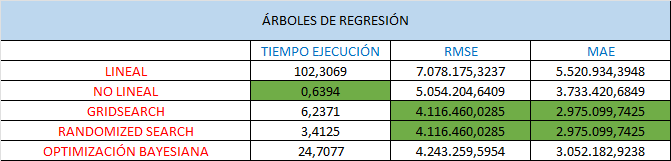

* Podemos oservar que el modelo no lineal es el más rápido al ejecutarse pero con los modelos con hiperparámetros de GridSearch y RandomizedSearch se obtienen unos mejores valores de MAE y RMSE y dado que el tiempo de ejecución de RandomizedSearch no es muy alto vamos a elegir ese modelo como el mejor en el apartado de árboles de regresión y decisión.

## 6.3 REGRESIÓN LINEAL

* Con la regresión lineal vamos a poder ver que peso tiene cada atributo a la hora de calcular el valor de la salida.
* Primero vamos a analizar la regresión por mínimos cuadrados sin realizar ningún ajuste de hiperparámetros. 
* Para el análisis con ajuste de hiperparámetros vamos a estudiar diferentes modelos:
    - Regresión de Ridge.
    - Regresión de Lasso
    - Regresión de Elastic Net


### EVALUACIÓN CON HIPERPARÁMETROS POR OMISIÓN

#### MÍNIMOS CUADRADOS

El tiempo de ejecución de esta regresión por mínimos cuadrados es: 0.05988597869873047
El RMSE de esta regresión por mínimos cuadrados es: 3997187.329437181
El MAE de esta regresión por mínimos cuadrados es: 2943961.5972549645
RESULTADOS DE LA REGRESION


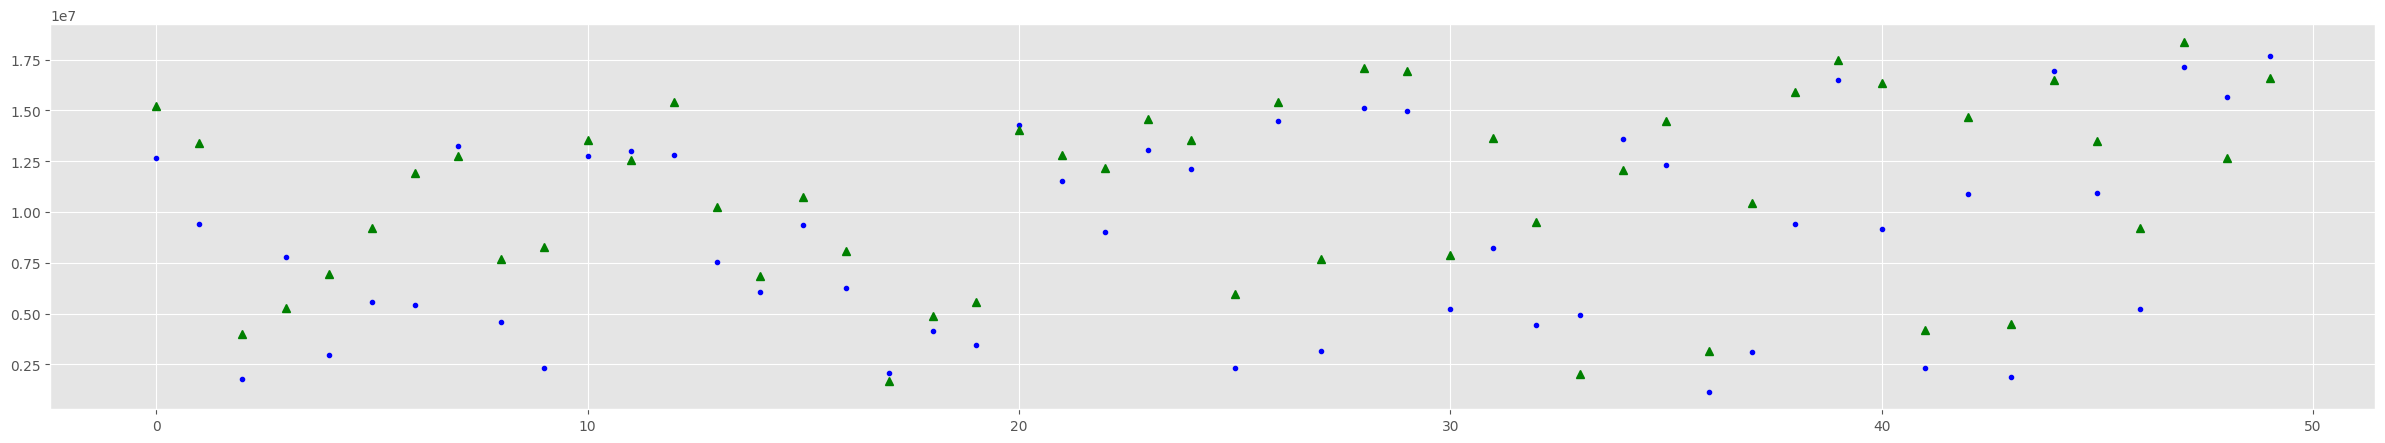

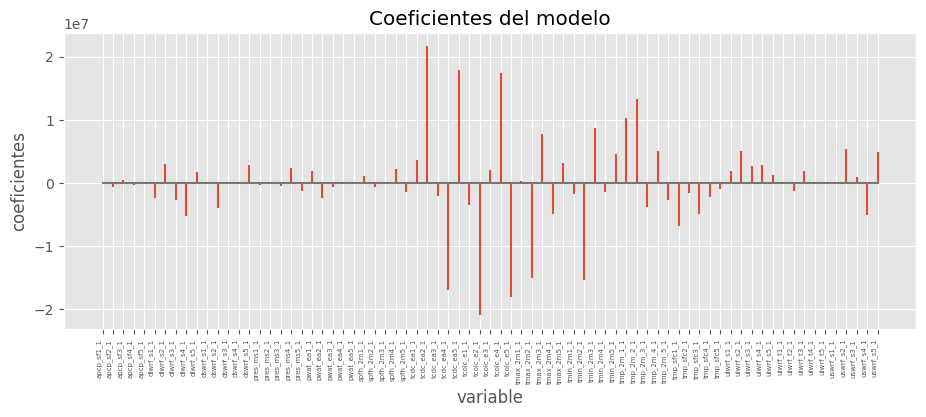

In [62]:
scaler = StandardScaler()
reg_lin = LinearRegression()

regresion_min_cuadradados = Pipeline([
    ('scale', scaler),
    ('REGL', reg_lin)])

t_inicio = time.time() #INICIO EJECUCIÓN

np.random.seed(29) # la semilla correspondiente al número del grupo

# CREAMOS EL MODELO
regresion_min_cuadradados.fit(X=X_train, y=Y_train)

#OBTENEMOS LA PREDICCIÓN
y_test_pred = regresion_min_cuadradados.predict(X=X_test)

t_fin = time.time() #FIN EJECUCIÓN
t_ejecución = t_fin - t_inicio #CALCULAMOS EL TIEMPO TOTAL DE EJECUCIÓN
print(f"El tiempo de ejecución de esta regresión por mínimos cuadrados es: {t_ejecución}")

rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)) #CALCULAMOS EL RMSE
print(f"El RMSE de esta regresión por mínimos cuadrados es: {rmse}")

mae = metrics.mean_absolute_error(Y_test, y_test_pred) #CALCULAMOS EL MAE
print(f"El MAE de esta regresión por mínimos cuadrados es: {mae}")

# Llamamos a la función para pintar los resultados, esta función se declaró al principio de la práctica
print("==============================================================================")
print("RESULTADOS DE LA REGRESION")
pintaResultados(regresion_min_cuadradados,50)
print("==============================================================================")

# Obtenemos los coeficientes de los distintos atributos y los mostramos en un gráfico
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_test.columns.tolist(),
                         'coef': regresion_min_cuadradados['REGL'].coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

### AJUSTE DE HIPERPARÁMETROS

#### RIDGE

El tiempo de ejecución de esta regresión de Ridge es: 0.7797873020172119
El RMSE de esta regresión pde Ridge es: 3599480.1726777744
El MAE de esta regresión de Ridge es: 2594777.0182333775
RESULTADOS DE LA REGRESION
Mejor valor de alpha encontrado: 0.06669919663030122


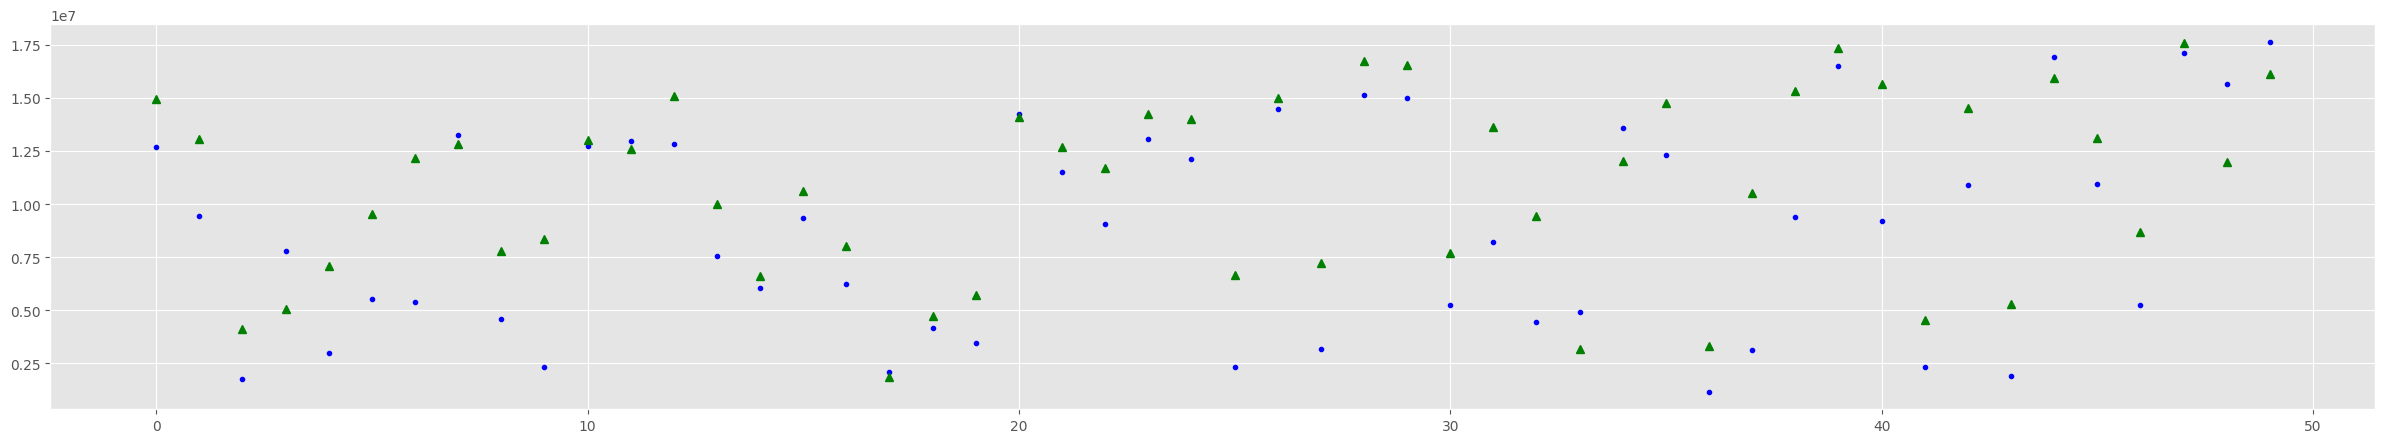

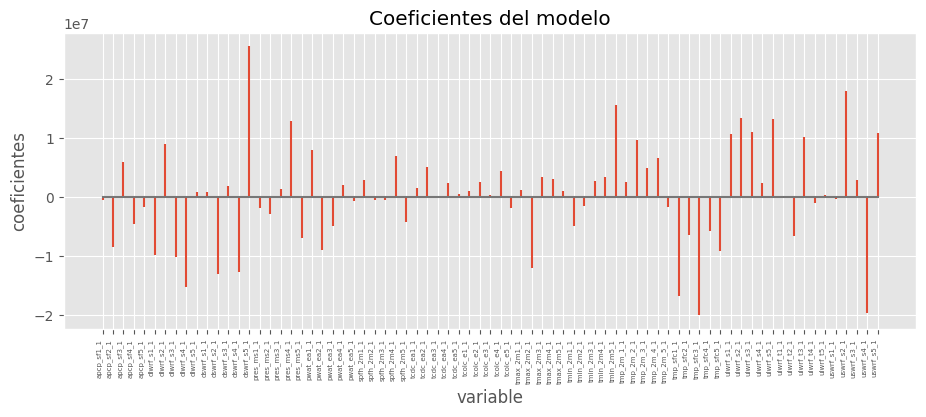

In [63]:
regresion_Ridge = RidgeCV(
            alphas          = np.logspace(-3, 8, 200),
            fit_intercept   = True,
            store_cv_values = True
         )

t_inicio = time.time() #INICIO EJECUCIÓN

np.random.seed(29)

# CREAMOS EL MODELO
regresion_Ridge.fit(X=X_train, y=Y_train)

#OBTENEMOS LA PREDICCIÓN
y_test_pred = regresion_Ridge.predict(X=X_test)

t_fin = time.time() #FIN EJECUCIÓN
t_ejecución = t_fin - t_inicio #CALCULAMOS EL TIEMPO TOTAL DE EJECUCIÓN
print(f"El tiempo de ejecución de esta regresión de Ridge es: {t_ejecución}")

rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)) #CALCULAMOS EL RMSE
print(f"El RMSE de esta regresión pde Ridge es: {rmse}")

mae = metrics.mean_absolute_error(Y_test, y_test_pred) #CALCULAMOS EL MAE
print(f"El MAE de esta regresión de Ridge es: {mae}")


# Llamamos a la función para pintar los resultados, esta función se declaró al principio de la práctica
print("RESULTADOS DE LA REGRESION")
pintaResultados(regresion_Ridge,50)
print("==============================================================================")


# ==============================================================================

# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {regresion_Ridge.alpha_}")
print("==============================================================================")

# ==============================================================================


# Obtenemos los coeficientes de los distintos atributos y los mostramos en un gráfico
# ==============================================================================

df_coeficientes = pd.DataFrame(
                        {'predictor': X_test.columns.tolist(),
                         'coef': regresion_Ridge.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');
# ==============================================================================


#### LASSO

El tiempo de ejecución de esta regresión de Lasso es: 15.167375564575195
El RMSE de esta regresión de Lasso es: 3683195.705403082
El MAE de esta regresión de Lasso es: 2676502.828099422
RESULTADOS DE LA REGRESION
Mejor valor de alpha encontrado: 329.2971255097148


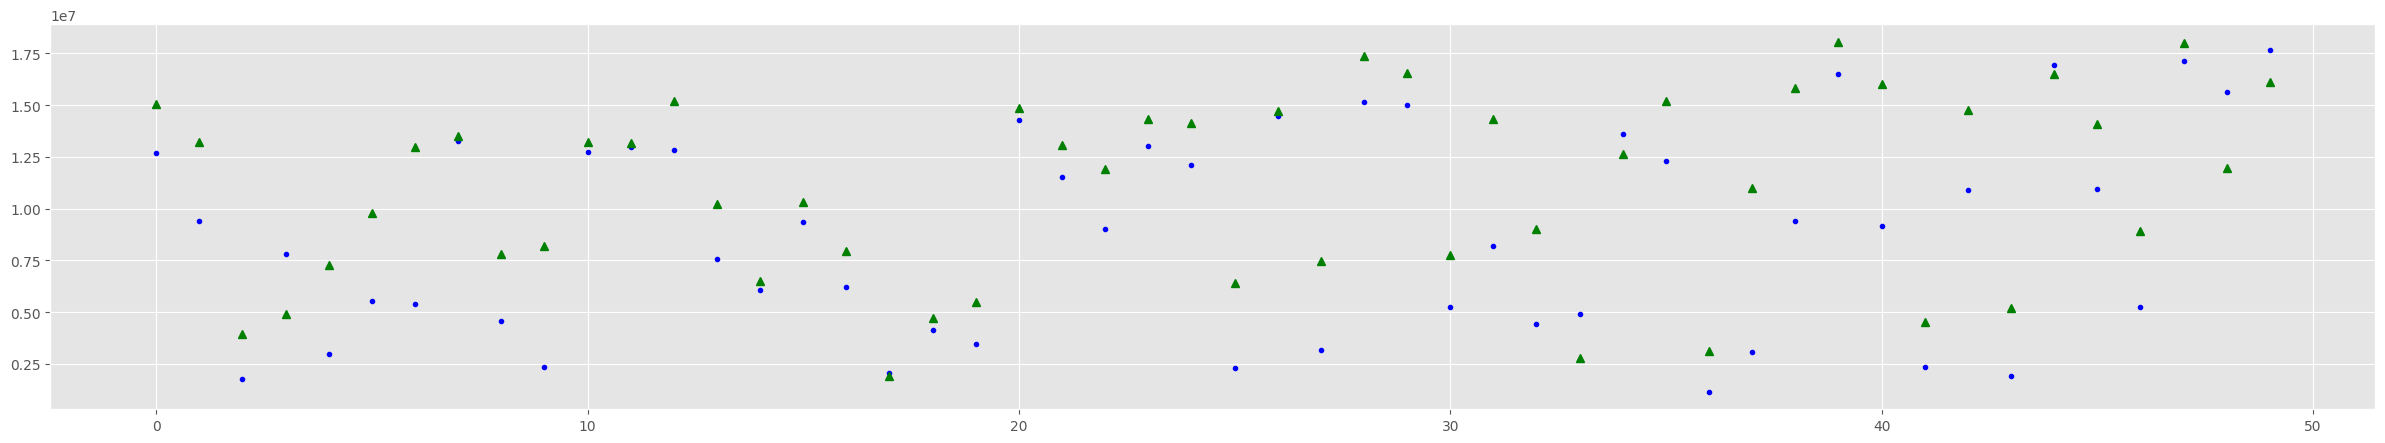

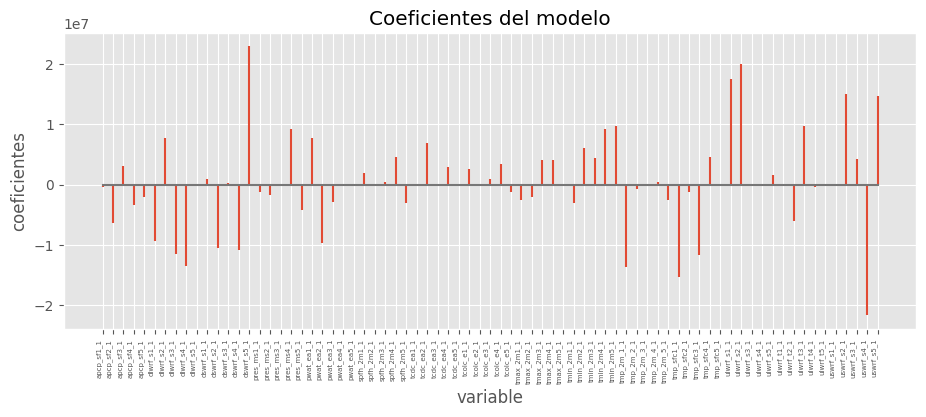

In [64]:
regresion_Lasso = LassoCV(
            alphas          = np.logspace(-9, 3, 200),
            cv              = 10
         )

t_inicio = time.time() #INICIO EJECUCIÓN



np.random.seed(29)


# CREAMOS EL MODELO
regresion_Lasso.fit(X=X_train, y=Y_train)

#OBTENEMOS LA PREDICCIÓN
y_test_pred = regresion_Lasso.predict(X=X_test)

t_fin = time.time() #FIN EJECUCIÓN
t_ejecución = t_fin - t_inicio #CALCULAMOS EL TIEMPO TOTAL DE EJECUCIÓN
print(f"El tiempo de ejecución de esta regresión de Lasso es: {t_ejecución}")

rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)) #CALCULAMOS EL RMSE
print(f"El RMSE de esta regresión de Lasso es: {rmse}")

mae = metrics.mean_absolute_error(Y_test, y_test_pred) #CALCULAMOS EL MAE
print(f"El MAE de esta regresión de Lasso es: {mae}")

# Llamamos a la función para pintar los resultados, esta función se declaró al principio de la práctica
print("==============================================================================")
print("RESULTADOS DE LA REGRESION")
pintaResultados(regresion_Lasso,50)
print("==============================================================================")


# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {regresion_Lasso.alpha_}")
print("==============================================================================")

# Obtenemos los coeficientes de los distintos atributos y los mostramos en un gráfico
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_test.columns.tolist(),
                         'coef': regresion_Lasso.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

#### ELASTIC NET

El tiempo de ejecución de esta regresión de Elastic Net es: 83.01031184196472
El RMSE de esta regresión de Elastic Net es: 3702250.145134426
El MAE de esta regresión de Elastic Net es: 2693505.2479715203
RESULTADOS DE LA REGRESION
Mejor valor de alpha encontrado: 0.000535356667741073
Mejor valor de l1_ratio encontrado: 0.95


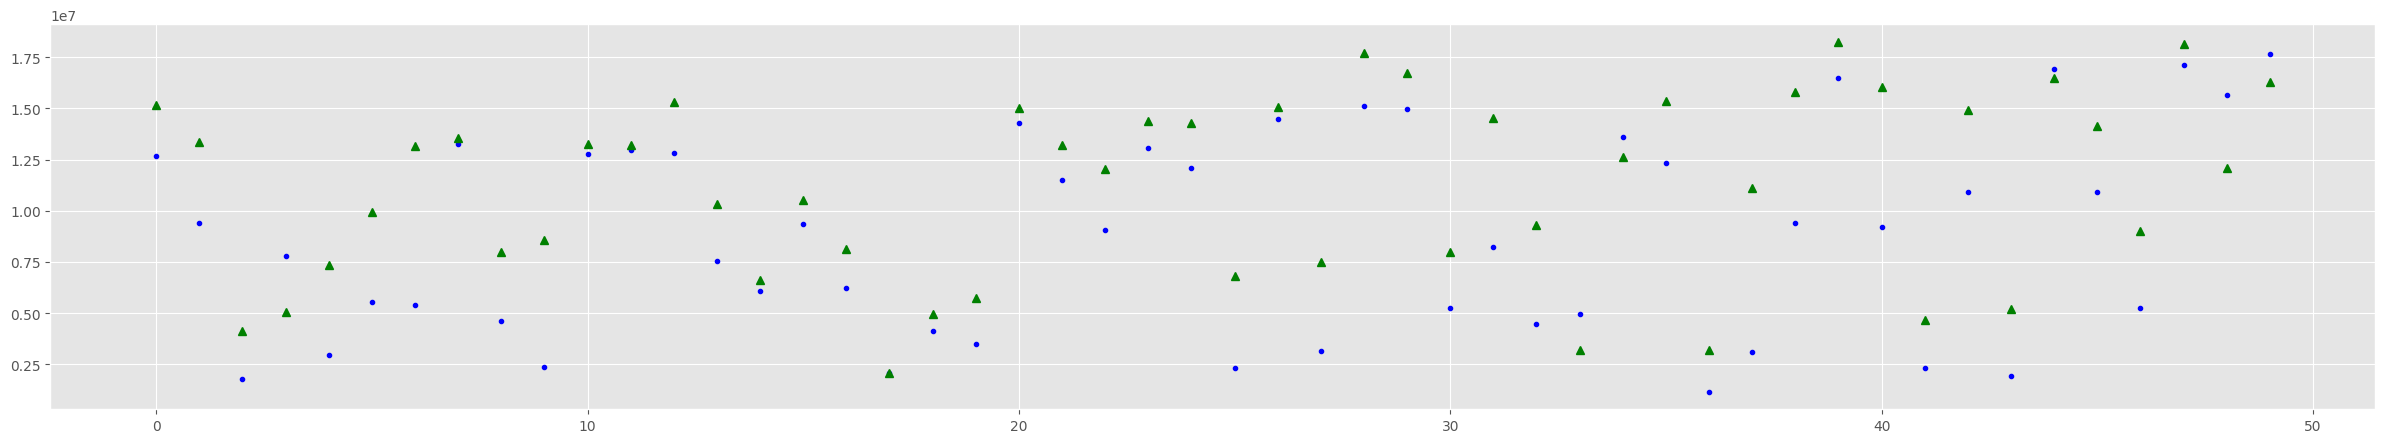

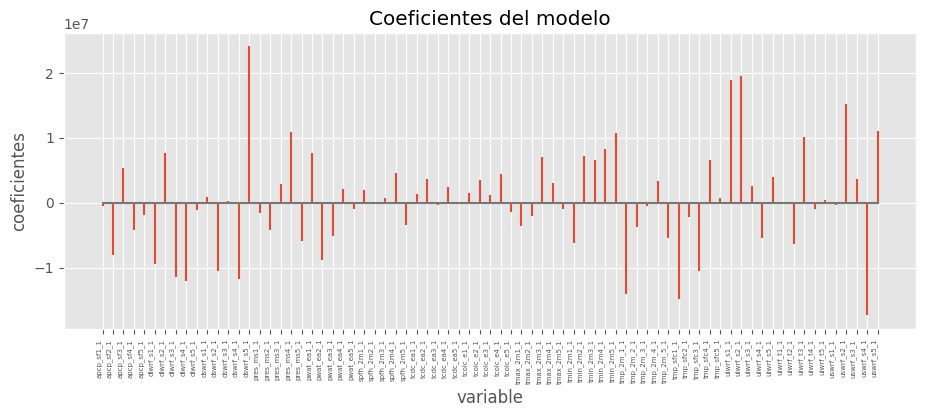

In [65]:
regresion_Elastic = ElasticNetCV(
            l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-10, 3, 200),
            cv              = 10
         )

t_inicio = time.time() #INICIO EJECUCIÓN



np.random.seed(29)


# CREAMOS EL MODELO
regresion_Elastic.fit(X=X_train, y=Y_train)

#OBTENEMOS LA PREDICCIÓN
y_test_pred = regresion_Elastic.predict(X=X_test)

t_fin = time.time() #FIN EJECUCIÓN
t_ejecución = t_fin - t_inicio #CALCULAMOS EL TIEMPO TOTAL DE EJECUCIÓN
print(f"El tiempo de ejecución de esta regresión de Elastic Net es: {t_ejecución}")

rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)) #CALCULAMOS EL RMSE
print(f"El RMSE de esta regresión de Elastic Net es: {rmse}")

mae = metrics.mean_absolute_error(Y_test, y_test_pred) #CALCULAMOS EL MAE
print(f"El MAE de esta regresión de Elastic Net es: {mae}")

# Llamamos a la función para pintar los resultados, esta función se declaró al principio de la práctica
print("==============================================================================")
print("RESULTADOS DE LA REGRESION")
pintaResultados(regresion_Elastic,50)
print("==============================================================================")


# Mejor valor alpha y l1_ratio_ encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {regresion_Elastic.alpha_}")
print(f"Mejor valor de l1_ratio encontrado: {regresion_Elastic.l1_ratio_}")
print("==============================================================================")

# Obtenemos los coeficientes de los distintos atributos y los mostramos en un gráfico
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_test.columns.tolist(),
                         'coef': regresion_Elastic.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

### COMPARACION ENTRE REGRESIONES

        Modelo  Núm. predictores
0       Lineal                75
1        Ridge                75
2        Lasso                61
3  Elastic Net                75


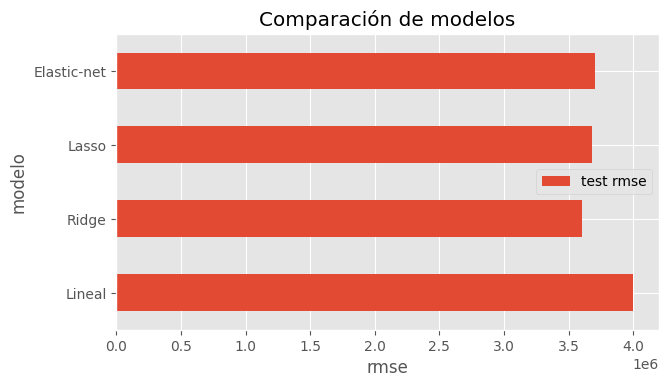

In [66]:
def rmse(y_test, y_test_pred): #CALCULAR EL RMSE
  return np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

rmse_lineal = rmse(Y_test, regresion_min_cuadradados.predict(X=X_test))
rmse_ridge = rmse(Y_test, regresion_Ridge.predict(X=X_test))
rmse_lasso = rmse(Y_test, regresion_Lasso.predict(X=X_test))
rmse_elastic = rmse(Y_test, regresion_Elastic.predict(X=X_test))
df_comparacion = pd.DataFrame({
                    'modelo': ['Lineal', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_lineal, rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

# Coeficientes de los distintos modelos
# ==============================================================================
d = [["Lineal", np.count_nonzero(np.abs(reg_lin.coef_.flatten()) > 0.5)],
     ["Ridge", np.count_nonzero(np.abs(regresion_Ridge.coef_.flatten()) > 0.5)],
     ["Lasso", np.count_nonzero(np.abs(regresion_Lasso.coef_.flatten()) > 0.5)],
     ["Elastic Net", np.count_nonzero(np.abs(regresion_Elastic.coef_.flatten()) > 0.5)]]

df = pd.DataFrame(d, columns = ['Modelo','Núm. predictores'])
print(df)

### CONCLUSIONES REGRESIÓN LINEAL

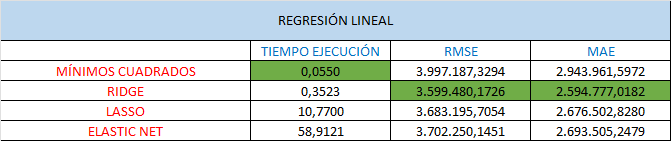

* En este caso podemos ver que el modelo que más rápido se ejecuta es mínimos cuadrados pero no es el modelo con menor error, ese es la regresión de Ridge y dado que el tiempo de ejecución es también bastante bajo vamos a escogerlo como mejor modelo.

## 6.4 CONCLUSIONES MÉTODOS BÁSICOS

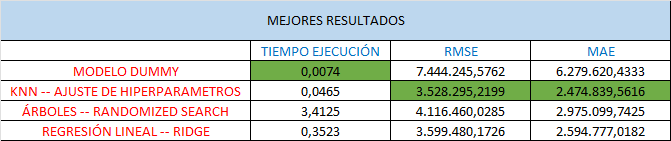
* Si comparamos los mejores modelo de cada tipo de análisis podemos ver que el mejor modelo en los apartados de errores es el de KNN, y aunque el modelo Dummy es el más rápido tiene el mayor error de todos.
* El método más rápido es el Dummy pero si no lo tenemos en cuenta ya que es unm método muy básico, el más rápido es también el de Ajuste de hiperparámetros de KNN, por lo tanto no queda ninguna dudad, de que éste es el mejor método de los evaluados hasta ahora.
* Tanto en árboles en KNN y en regresión lineal podemos observar que los métodos con ajuste de hiperparámetros encuentran una mejor tasa de error, esto se debe a que pueden ir ajustando los distintos parámetros y hallar una mejor configuración.

# 7. REDUCCIÓN DE DIMENSIONALIDAD
* Para reducir la dimensionalidad de los datos, vamos a probar 2 métodos diferentes:
  - El primero será eliminar manualmente las variables con la correlación menor a 0.2 o mayor a -0.2, con la salida, es decir eliminaremos los datos menos relevantes a la hora de calcular la salida.
  - Estas columnas son las siguientes:
    - apcp_sf1_1
    - dlwrf_s2_1
    - pres_ms1_1
    - pres_ms2_1
    - pres_ms3_1
    - pres_ms4_1
    - pres_ms5_1
    - pwat_ea1_1
    - pwat_ea2_1
    - pwat_ea3_1
    - pwat_ea4_1
    - pwat_ea5_1 

  - El segundo método será con un Análisis de componentes principales, con el que reduciremos el número de variables de los datos.

In [67]:
datos_disp_red = pd.read_csv("disp_st29ns1.txt.bz2", compression="bz2", index_col=0)
datos_disp_red =datos_disp_red.drop(['apcp_sf1_1'], axis=1)
datos_disp_red =datos_disp_red.drop(['dlwrf_s2_1'], axis=1)
datos_disp_red =datos_disp_red.drop(['pres_ms1_1'], axis=1)
datos_disp_red =datos_disp_red.drop(['pres_ms2_1'], axis=1)
datos_disp_red =datos_disp_red.drop(['pres_ms3_1'], axis=1)
datos_disp_red =datos_disp_red.drop(['pres_ms4_1'], axis=1)
datos_disp_red =datos_disp_red.drop(['pres_ms5_1'], axis=1)
datos_disp_red =datos_disp_red.drop(['pwat_ea1_1'], axis=1)
datos_disp_red =datos_disp_red.drop(['pwat_ea2_1'], axis=1)
datos_disp_red =datos_disp_red.drop(['pwat_ea3_1'], axis=1)
datos_disp_red =datos_disp_red.drop(['pwat_ea4_1'], axis=1)
datos_disp_red =datos_disp_red.drop(['pwat_ea5_1'], axis=1)

#DIVISIÓN DE DATOS EN TRAIN Y TEST
train_red = datos_disp_red.iloc[0:3650] # CONJUNTO DE TRAIN
test_red = datos_disp_red.iloc[3650:4380] # CONJUNTO DE TEST

scaler = MinMaxScaler()

train_red_normalizado = pd.DataFrame(scaler.fit_transform(train_red),columns=datos_disp_red.columns)
test_red_normalizado = pd.DataFrame(scaler.fit_transform(test_red),columns=datos_disp_red.columns)

X_train_red = train_red_normalizado.iloc[:,:-1]
X_test_red = test_red_normalizado.iloc[:,:-1]             

Y_train_red = train_red.iloc[:,-1]
Y_test_red = test_red.iloc[:,-1]

train_indices_red = np.full((2920,), -1, dtype=int) # 8 years
val_indices_red = np.full((730,), 0, dtype=int) # 2 years
test_fold_red = np.append(train_indices_red, val_indices_red)


print('======================================')
print('Las dimensiones de la tabla son:')
print(datos_disp_red.shape)
print('===============================')
print()

print('======================================')
print('Nombre de columnas:')
print(datos_disp_red.columns)
print('======================================')
print()



Las dimensiones de la tabla son:
(4380, 64)

Nombre de columnas:
Index(['apcp_sf2_1', 'apcp_sf3_1', 'apcp_sf4_1', 'apcp_sf5_1', 'dlwrf_s1_1',
       'dlwrf_s3_1', 'dlwrf_s4_1', 'dlwrf_s5_1', 'dswrf_s1_1', 'dswrf_s2_1',
       'dswrf_s3_1', 'dswrf_s4_1', 'dswrf_s5_1', 'spfh_2m1_1', 'spfh_2m2_1',
       'spfh_2m3_1', 'spfh_2m4_1', 'spfh_2m5_1', 'tcdc_ea1_1', 'tcdc_ea2_1',
       'tcdc_ea3_1', 'tcdc_ea4_1', 'tcdc_ea5_1', 'tcolc_e1_1', 'tcolc_e2_1',
       'tcolc_e3_1', 'tcolc_e4_1', 'tcolc_e5_1', 'tmax_2m1_1', 'tmax_2m2_1',
       'tmax_2m3_1', 'tmax_2m4_1', 'tmax_2m5_1', 'tmin_2m1_1', 'tmin_2m2_1',
       'tmin_2m3_1', 'tmin_2m4_1', 'tmin_2m5_1', 'tmp_2m_1_1', 'tmp_2m_2_1',
       'tmp_2m_3_1', 'tmp_2m_4_1', 'tmp_2m_5_1', 'tmp_sfc1_1', 'tmp_sfc2_1',
       'tmp_sfc3_1', 'tmp_sfc4_1', 'tmp_sfc5_1', 'ulwrf_s1_1', 'ulwrf_s2_1',
       'ulwrf_s3_1', 'ulwrf_s4_1', 'ulwrf_s5_1', 'ulwrf_t1_1', 'ulwrf_t2_1',
       'ulwrf_t3_1', 'ulwrf_t4_1', 'ulwrf_t5_1', 'uswrf_s1_1', 'uswrf_s2_1',
       'usw

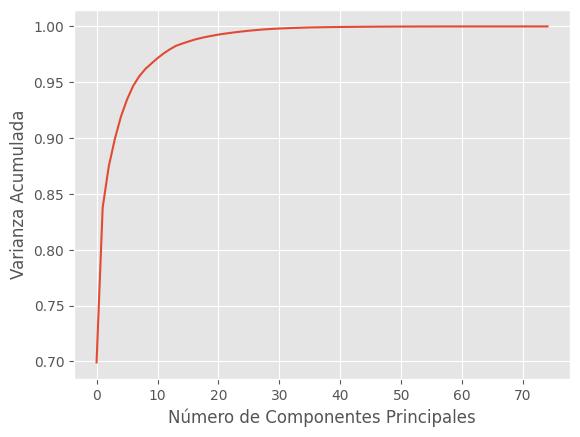

In [68]:
pca = PCA()
pca.fit(X_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.show()



In [69]:
def rmse(y_test, y_test_pred): 
  return np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

rmse_lineal = rmse(Y_test, regresion_min_cuadradados.predict(X=X_test))

pca = PCA(n_components=40)
pca.fit(X_train)
# Datos con el PCA
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
reg_lin_pca = LinearRegression()
np.random.seed()
reg_lin_pca.fit(X=X_train_pca, y=Y_train)
#Obtenemos las predicciones
Y_test_pred_pca = reg_lin_pca.predict(X_test_pca)
#Calculamos la precisión
rmse_reg_pca = np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred_pca))
mae_reg_pca = metrics.mean_absolute_error(Y_test,Y_test_pred_pca)
print(f"RMSE de regresión lineal por mínimos cuadrados: {rmse_lineal}")
print(f"RMSE con PCA: {rmse_reg_pca}")
error_total = rmse_reg_pca-rmse_lineal
print(f"Diferencia de los errores: {error_total}")

RMSE de regresión lineal por mínimos cuadrados: 3997187.329437181
RMSE con PCA: 3776874.574630408
Diferencia de los errores: -220312.7548067728


## ANÁLISIS REDUCCIÓN DIMENSIONALIDAD
* Tras ejecutar los métodos avanzados con los 3 conjuntos de datos, con reducción manual, con PCA y sin ninguna modificación, hemos llegado a las siguientes conclusiones.
* Con eliminación de variables:
  - En el SVM el lineal, es decir, cuando no se ajustan los hiperparámetros, los resultados empeoran, pero en los métodos con ajuste de hiperparámetros si se nota una mejora en los resultados. Pero los resultado del SVM lineal son bastante mejores, por lo tanto no se produce una mejora con la reducción.
  - En el método de random forest ambos modelos obtienen peores resultados cuando se reduce la dimensionalidad de los datos.

* Con PCA, la gran mayoría de los modelos empeoran sus resultados pero al usar el nuevo conjunto de datos se encuentra un modelo mejor que con el conjunto normal.


* Debido a estas razones hemos decidido usar el conjunto de datos con PCA para el resto de la práctica.

# 8. MÉTODOS AVANZADOS
# CREACIÓN, EVALUACIÓN Y ANÁLISIS DE LOS MODELOS
Usaremos los siguientes métodos:
 - SVM
 - Random Forest

* Las métricas que vamos a emplear para evaluar los modelos son las siguientes:
 - Raíz del error cuadrático medio(RMSE): El cual usaremos de la siguiente manera: rmse = np.sqrt(metrics.mean_squared_error(Y_train, X_train_prediccion)).

 - Error absoluto medio(MAE): El cual usaremos de la siguiente manera: mae_median = metrics.mean_absolute_error(Y_train, X_train_prediccion)

 - Tiempo de ejecución: Lo calcularemos usando la función time.

## 8.1 SVM

* Primero realizaremos un análisis sin ajuste de hiperparámetros y usaremos un modelo lineal.
* Después uaremos modelo en los que ajustaremos diferentes hiperparámetros:
    - C: Indica el coste de regularización
    - Gamma: Indica la curvatura en la frontera de decisión.
* Los métodos que usaremos son:
    - GridSearch
    - Randomized Search
    - Bayes Search.

### SVM Lineal

#### EVALUACIÓN CON HIPERPARÁMETROS POR OMISIÓN

In [70]:

# Creación del modelo SVM lineal
# ==============================================================================
modelo_svm = SVR(kernel='linear')

np.random.seed(29)

t_inicio = time.time() #INICIO EJECUCIÓN

modelo_svm.fit(X_train_pca, Y_train)

# Predicciones test
# ==============================================================================
y_test_pred = modelo_svm.predict(X_test_pca)


t_fin = time.time() #FIN EJECUCIÓN
t_ejecución = t_fin - t_inicio #CALCULAMOS EL TIEMPO TOTAL DE EJECUCIÓN
print(f"El tiempo de ejecución de este modelo SVM lineal es: {t_ejecución}")

rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)) #CALCULAMOS EL RMSE
print(f"El RMSE de este modelo SVM lineal es: {rmse}")

mae = metrics.mean_absolute_error(Y_test, y_test_pred) #CALCULAMOS EL MAE
print(f"El MAE de este modelo SVM lineal es: {mae}")

print(f"Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: ")
print(np.hstack((y_test_pred[:5,np.newaxis], Y_test[:5,np.newaxis])))

El tiempo de ejecución de este modelo SVM lineal es: 1.2345457077026367
El RMSE de este modelo SVM lineal es: 7446097.086969638
El MAE de este modelo SVM lineal es: 6280026.128315361
Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: 
[[16449499.0080626  12672900.        ]
 [16450263.39037471  9417900.        ]
 [16451970.77153868  1773000.        ]
 [16452787.08706692  7792200.        ]
 [16453658.59326877  2965500.        ]]


#### AJUSTE DE HIPERPARÁMETROS

##### GRIDSEARCH

In [71]:
def rmse(y_test, y_test_pred): #CALCULAR EL RMSE
  return np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))


# This is the preprocessing pipeline: SVMs need scaling
scaler = StandardScaler()
svr = SVR(kernel='linear')

pipe_regr = Pipeline([
    ('scale', scaler),
    ('SVM', svr)])

np.random.seed(29)
pipe_regr.fit(X=X_train_pca, y=Y_train)

print(f"El RMSE con los parámetros por defecto es: {rmse(Y_test, pipe_regr.predict(X=X_test_pca))}")


t_inicio = time.time()
# Search space
param_grid = {'SVM__C': [0.1, 1, 10, 100]}

validacion = PredefinedSplit(test_fold)

#inner = KFold(n_splits=3, shuffle=True, random_state=29)

# Definition of a 2-step process that self-adjusts 2 hyperpars
hpo_regr = GridSearchCV(pipe_regr, 
                        param_grid,
                        scoring='neg_mean_squared_error',
                        cv=validacion, 
                        n_jobs=4, verbose=1)

# Train the self-adjusting process
np.random.seed(29)
hpo_regr.fit(X=X_train_pca, y=Y_train)

y_test_pred = hpo_regr.predict(X_test_pca)

t_fin = time.time() #FIN EJECUCIÓN
t_ejecución = t_fin - t_inicio #CALCULAMOS EL TIEMPO TOTAL DE EJECUCIÓN
print(f"El tiempo de ejecución de este modelo SVM con GridSearch es: {t_ejecución}")

rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)) #CALCULAMOS EL RMSE
print(f"El RMSE de este modelo SVM con GridSearch es: {rmse}")

mae = metrics.mean_absolute_error(Y_test, y_test_pred) #CALCULAMOS EL MAE
print(f"El MAE de este modelo SVM con GridSearch es: {mae}")


print(f"Los mejores parametros de este modelo son: {hpo_regr.best_params_}")
#print(f"El resultado con los mejores parametros de esta regresión es: {hpo_regr.best_score_}")


print(f"Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: ")
print(np.hstack((y_test_pred[:5,np.newaxis], Y_test[:5,np.newaxis])))


El RMSE con los parámetros por defecto es: 7446073.693285848
Fitting 1 folds for each of 4 candidates, totalling 4 fits
El tiempo de ejecución de este modelo SVM con GridSearch es: 5.625290632247925
El RMSE de este modelo SVM con GridSearch es: 7203177.457952861
El MAE de este modelo SVM con GridSearch es: 6060299.452643397
Los mejores parametros de este modelo son: {'SVM__C': 100}
Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: 
[[16203303.19298789 12672900.        ]
 [16193216.38293448  9417900.        ]
 [15852469.31050475  1773000.        ]
 [16006461.24102522  7792200.        ]
 [16062424.57039147  2965500.        ]]


##### RANDOMIZED SEARCH

In [72]:
def rmse(y_test, y_test_pred): #CALCULAR EL RMSE
  return np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))


# This is the preprocessing pipeline: SVMs need scaling
scaler = StandardScaler()
svr = SVR(kernel='linear')

pipe_regr = Pipeline([
    ('scale', scaler),
    ('SVM', svr)])

np.random.seed(29)


t_inicio = time.time()
# Search space
param_grid = {'SVM__C':  loguniform(1e-1, 1e4)}

validacion = PredefinedSplit(test_fold)

# Definition of a 2-step process that self-adjusts 2 hyperpars
budget = 20 
hpo_regr = RandomizedSearchCV(pipe_regr, 
                            param_grid,
                            scoring='neg_mean_squared_error',
                            cv=validacion, 
                            n_jobs=-1, verbose=1,
                            n_iter=budget
                        )

# Train the self-adjusting process
np.random.seed(29)
hpo_regr.fit(X=X_train_pca, y=Y_train)

y_test_pred = hpo_regr.predict(X_test_pca)

t_fin = time.time() #FIN EJECUCIÓN
t_ejecución = t_fin - t_inicio #CALCULAMOS EL TIEMPO TOTAL DE EJECUCIÓN
print(f"El tiempo de ejecución de este modelo SVM con Randomized Search es: {t_ejecución}")

rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)) #CALCULAMOS EL RMSE
print(f"El RMSE de este modelo SVM con Randomized Search es: {rmse}")

mae = metrics.mean_absolute_error(Y_test, y_test_pred) #CALCULAMOS EL MAE
print(f"El MAE de este modelo SVM con Randomized Search es {mae}")


print(f"Los mejores parametros de este modelo son: {hpo_regr.best_params_}")
#print(f"El resultado con los mejores parametros de esta regresión es: {hpo_regr.best_score_}")


print(f"Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: ")
print(np.hstack((y_test_pred[:5,np.newaxis], Y_test[:5,np.newaxis])))


Fitting 1 folds for each of 20 candidates, totalling 20 fits
El tiempo de ejecución de este modelo SVM con Randomized Search es: 12.72534704208374
El RMSE de este modelo SVM con Randomized Search es: 4117038.474376553
El MAE de este modelo SVM con Randomized Search es 3163242.0138358376
Los mejores parametros de este modelo son: {'SVM__C': 2083.530814433579}
Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: 
[[14035050.3709746  12672900.        ]
 [13308982.13228506  9417900.        ]
 [ 6799596.65005182  1773000.        ]
 [ 8574359.3508485   7792200.        ]
 [ 9762177.85545781  2965500.        ]]


##### OPTIMIZACIÓN BAYESIANA

In [73]:

# This is the preprocessing pipeline: SVMs need scaling
scaler = StandardScaler()
svr = SVR(kernel='linear')

pipe_regr = Pipeline([
    ('scale', scaler),
    ('SVM', svr)])

t_inicio = time.time()

# Search space
# [0.1, 1, 10, 100, 1000, 10000]
# [0.0001, 0.001, 0.01, 0.1, 1]
#param_grid = {'SVM__C': Real(1e-1, 1e4, prior="loguniform"),
param_grid = {'SVM__C': Real(1e-1, 1e4, prior="log-uniform")}

validacion = PredefinedSplit(test_fold)
# Train the self-adjusting process
np.random.seed(29)
hpo_regr.fit(X=X_train_pca, y=Y_train)

budget = 20
hpo_regr = BayesSearchCV(pipe_regr, 
                        param_grid,
                        scoring='neg_mean_squared_error',
                        cv=validacion, 
                        n_jobs=4, verbose=0,
                        n_iter=budget
                        )
hpo_regr.fit(X=X_train_pca, y=Y_train)

y_test_pred = hpo_regr.predict(X_test_pca)

t_fin = time.time() #FIN EJECUCIÓN
t_ejecución = t_fin - t_inicio #CALCULAMOS EL TIEMPO TOTAL DE EJECUCIÓN
print(f"El tiempo de ejecución de este modelo SVM con Optimización Bayesiana es: {t_ejecución}")

rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)) #CALCULAMOS EL RMSE
print(f"El RMSE de este modelo SVM con Optimización Bayesiana es: {rmse}")

mae = metrics.mean_absolute_error(Y_test, y_test_pred) #CALCULAMOS EL MAE
print(f"El MAE de este modelo SVM con Optimización Bayesiana es: {mae}")


print(f"Los mejores parametros de esta regresión son: {hpo_regr.best_params_}")
#print(f"El resultado con los mejores parametros de esta regresión es: {hpo_regr.best_score_}")


print(f"Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: ")
print(np.hstack((y_test_pred[:5,np.newaxis], Y_test[:5,np.newaxis])))



Fitting 1 folds for each of 20 candidates, totalling 20 fits
El tiempo de ejecución de este modelo SVM con Optimización Bayesiana es: 45.91774654388428
El RMSE de este modelo SVM con Optimización Bayesiana es: 3799450.744056413
El MAE de este modelo SVM con Optimización Bayesiana es: 2738935.1201924044
Los mejores parametros de esta regresión son: OrderedDict([('SVM__C', 8825.140253262774)])
Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: 
[[14792525.82606315 12672900.        ]
 [13162801.36316461  9417900.        ]
 [ 3242567.95427153  1773000.        ]
 [ 4891367.22464055  7792200.        ]
 [ 7469445.55446427  2965500.        ]]


### SVM Radial

#### EVALUACIÓN CON HIPERPARÁMETROS POR OMISIÓN

In [74]:

# Creación del modelo SVM lineal
# ==============================================================================
modelo_svm = SVR(kernel='rbf')
np.random.seed(29)

t_inicio = time.time() #INICIO EJECUCIÓN

modelo_svm.fit(X_train_pca, Y_train)


# Predicciones test
# ==============================================================================
y_test_pred = modelo_svm.predict(X_test_pca)


t_fin = time.time() #FIN EJECUCIÓN
t_ejecución = t_fin - t_inicio #CALCULAMOS EL TIEMPO TOTAL DE EJECUCIÓN
print(f"El tiempo de ejecución de este modelo SVM radial es: {t_ejecución}")

rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)) #CALCULAMOS EL RMSE
print(f"El RMSE de este modelo SVM radial es: {rmse}")

mae = metrics.mean_absolute_error(Y_test, y_test_pred) #CALCULAMOS EL MAE
print(f"El MAE de este modelo SVM radial es: {mae}")

print(f"Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: ")
print(np.hstack((y_test_pred[:5,np.newaxis], Y_test[:5,np.newaxis])))

El tiempo de ejecución de este modelo SVM radial es: 1.104621171951294
El RMSE de este modelo SVM radial es: 7448376.230920523
El MAE de este modelo SVM radial es: 6282200.069488555
Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: 
[[16454270.09049484 12672900.        ]
 [16454252.1435167   9417900.        ]
 [16454411.15356594  1773000.        ]
 [16454509.70055524  7792200.        ]
 [16454622.27576665  2965500.        ]]


#### AJUSTE DE HIPERPARÁMETROS

##### GRIDSEARCH

In [75]:
def rmse(y_test, y_test_pred): #CALCULAR EL RMSE
  return np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))


# This is the preprocessing pipeline: SVMs need scaling
scaler = StandardScaler()
svr = SVR(kernel='rbf')

pipe_regr = Pipeline([
    ('scale', scaler),
    ('SVM', svr)])

np.random.seed(29)
pipe_regr.fit(X=X_train_pca, y=Y_train)

print(f"El RMSE con los parámetros por defecto es: {rmse(Y_test, pipe_regr.predict(X=X_test_pca))}")


t_inicio = time.time()
# Search space
param_grid = {'SVM__C': [0.1, 1, 10, 100],
              'SVM__gamma': [0.01, 0.1, 1]}

validacion = PredefinedSplit(test_fold)

# Definition of a 2-step process that self-adjusts 2 hyperpars
hpo_regr = GridSearchCV(pipe_regr, 
                        param_grid,
                        scoring='neg_mean_squared_error',
                        cv=validacion, 
                        n_jobs=4, verbose=1)

# Train the self-adjusting process
np.random.seed(29)
hpo_regr.fit(X=X_train_pca, y=Y_train)

y_test_pred = hpo_regr.predict(X_test_pca)

t_fin = time.time() #FIN EJECUCIÓN
t_ejecución = t_fin - t_inicio #CALCULAMOS EL TIEMPO TOTAL DE EJECUCIÓN
print(f"El tiempo de ejecución de este modelo SVM con GridSearch es: {t_ejecución}")

rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)) #CALCULAMOS EL RMSE
print(f"El RMSE de este modelo SVM con GridSearch es: {rmse}")

mae = metrics.mean_absolute_error(Y_test, y_test_pred) #CALCULAMOS EL MAE
print(f"El MAE de este modelo SVM con GridSearch es: {mae}")


print(f"Los mejores parametros de este modelo son: {hpo_regr.best_params_}")
#print(f"El resultado con los mejores parametros de esta regresión es: {hpo_regr.best_score_}")


print(f"Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: ")
print(np.hstack((y_test_pred[:5,np.newaxis], Y_test[:5,np.newaxis])))


El RMSE con los parámetros por defecto es: 7448642.054597531
Fitting 1 folds for each of 12 candidates, totalling 12 fits
El tiempo de ejecución de este modelo SVM con GridSearch es: 12.200086116790771
El RMSE de este modelo SVM con GridSearch es: 7444978.596822273
El MAE de este modelo SVM con GridSearch es: 6279137.516859935
Los mejores parametros de este modelo son: {'SVM__C': 100, 'SVM__gamma': 0.01}
Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: 
[[16448345.88354009 12672900.        ]
 [16448192.55484343  9417900.        ]
 [16445180.0625478   1773000.        ]
 [16446695.17910201  7792200.        ]
 [16447685.25797952  2965500.        ]]


##### RANDOMIZED SEARCH

In [76]:
def rmse(y_test, y_test_pred): #CALCULAR EL RMSE
  return np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))


# This is the preprocessing pipeline: SVMs need scaling
scaler = StandardScaler()
svr = SVR(kernel='rbf')

pipe_regr = Pipeline([
    ('scale', scaler),
    ('SVM', svr)])

np.random.seed(29)


t_inicio = time.time()
# Search space
param_grid = {'SVM__C': loguniform(1e-1, 1e4),
              'SVM__gamma': loguniform(1e-4, 1e0)}

validacion = PredefinedSplit(test_fold)

# Definition of a 2-step process that self-adjusts 2 hyperpars
budget = 20 
hpo_regr = RandomizedSearchCV(pipe_regr, 
                            param_grid,
                            scoring='neg_mean_squared_error',
                            cv=validacion, 
                            n_jobs=-1, verbose=1,
                            n_iter=budget
                        )

# Train the self-adjusting process
np.random.seed(29)
hpo_regr.fit(X=X_train_pca, y=Y_train)

y_test_pred = hpo_regr.predict(X_test_pca)

t_fin = time.time() #FIN EJECUCIÓN
t_ejecución = t_fin - t_inicio #CALCULAMOS EL TIEMPO TOTAL DE EJECUCIÓN
print(f"El tiempo de ejecución de este modelo SVM con Randomized Search es: {t_ejecución}")

rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)) #CALCULAMOS EL RMSE
print(f"El RMSE de este modelo SVM con Randomized Search es: {rmse}")

mae = metrics.mean_absolute_error(Y_test, y_test_pred) #CALCULAMOS EL MAE
print(f"El MAE de este modelo SVM con Randomized Search es {mae}")


print(f"Los mejores parametros de este modelo son: {hpo_regr.best_params_}")
#print(f"El resultado con los mejores parametros de esta regresión es: {hpo_regr.best_score_}")


print(f"Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: ")
print(np.hstack((y_test_pred[:5,np.newaxis], Y_test[:5,np.newaxis])))


Fitting 1 folds for each of 20 candidates, totalling 20 fits
El tiempo de ejecución de este modelo SVM con Randomized Search es: 16.091657876968384
El RMSE de este modelo SVM con Randomized Search es: 7420452.79977426
El MAE de este modelo SVM con Randomized Search es 6256863.810067978
Los mejores parametros de este modelo son: {'SVM__C': 1064.7336826294459, 'SVM__gamma': 0.005648720879617193}
Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: 
[[16419162.85764658 12672900.        ]
 [16417817.11039501  9417900.        ]
 [16390446.48310925  1773000.        ]
 [16404245.81279548  7792200.        ]
 [16411570.31203269  2965500.        ]]


##### BAYES SEARCH

In [77]:

# This is the preprocessing pipeline: SVMs need scaling
scaler = StandardScaler()
svr = SVR(kernel='rbf')

pipe_regr = Pipeline([
    ('scale', scaler),
    ('SVM', svr)])

t_inicio = time.time()

# Search space
# [0.1, 1, 10, 100, 1000, 10000]
# [0.0001, 0.001, 0.01, 0.1, 1]
#param_grid = {'SVM__C': Real(1e-1, 1e4, prior="loguniform"),
param_grid = {'SVM__C': Real(1e-1, 1e4, prior="log-uniform"),
              'SVM__gamma': Real(1e-4, 1e0, prior="log-uniform")}

validacion = PredefinedSplit(test_fold)
# Train the self-adjusting process
np.random.seed(29)
hpo_regr.fit(X=X_train_pca, y=Y_train)

budget = 20
hpo_regr = BayesSearchCV(pipe_regr, 
                        param_grid,
                        scoring='neg_mean_squared_error',
                        cv=validacion, 
                        n_jobs=4, verbose=0,
                        n_iter=budget
                        )
hpo_regr.fit(X=X_train_pca, y=Y_train)

y_test_pred = hpo_regr.predict(X_test_pca)

t_fin = time.time() #FIN EJECUCIÓN
t_ejecución = t_fin - t_inicio #CALCULAMOS EL TIEMPO TOTAL DE EJECUCIÓN
print(f"El tiempo de ejecución de este modelo SVM con Optimización Bayesiana es: {t_ejecución}")

rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)) #CALCULAMOS EL RMSE
print(f"El RMSE de este modelo SVM con Optimización Bayesiana es: {rmse}")

mae = metrics.mean_absolute_error(Y_test, y_test_pred) #CALCULAMOS EL MAE
print(f"El MAE de este modelo SVM con Optimización Bayesiana es: {mae}")


print(f"Los mejores parametros de esta regresión son: {hpo_regr.best_params_}")
#print(f"El resultado con los mejores parametros de esta regresión es: {hpo_regr.best_score_}")


print(f"Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: ")
print(np.hstack((y_test_pred[:5,np.newaxis], Y_test[:5,np.newaxis])))

Fitting 1 folds for each of 20 candidates, totalling 20 fits
El tiempo de ejecución de este modelo SVM con Optimización Bayesiana es: 52.67206597328186
El RMSE de este modelo SVM con Optimización Bayesiana es: 7084303.61780127
El MAE de este modelo SVM con Optimización Bayesiana es: 5945140.279368868
Los mejores parametros de esta regresión son: OrderedDict([('SVM__C', 10000.0), ('SVM__gamma', 0.013066060300687063)])
Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: 
[[15826194.66640344 12672900.        ]
 [15811624.50242878  9417900.        ]
 [15536166.60769057  1773000.        ]
 [15669357.22594895  7792200.        ]
 [15761855.91864625  2965500.        ]]


### CONCLUSIONES SVM

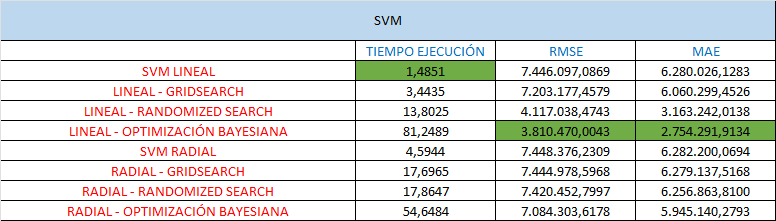
* Analizando los resultados, podemos concluir que el SVM Lineal es el más rápido en ejecutarse pero con una tasa de fallo muy alta, y el modelo que menos tasa de error es el lineal con Bayes Search, pero con un tiempo de ejecución bastante alto. 
* Por ello hemos buscado un equilibrio entre ambos indicadores, nos hemos quedado como mejor modelo con el SVM Lineal con Randomized Search.


## 8.2 RANDOM FOREST

* Primero realizaremos un análisis sin ajuste de hiperparámetros.
* Después caclualremos los valores óptimos de los hiperparámetros que queremos ajustar, el código para obtener estos datos se dejará comentado ya que conllevan mucho tiempo de ejecución:
    - Número de árboles
    - Número de predictores
  
* Finalmente ejecutaremos el modelo con los mejores parámetros obtenidos.
* Después aplicaremos Gradient Boosting y realizaremos una ejecución sin ajuste de hiperparámetros.
* Finalmente ejecuataremos 3 tipos de modelos con Randomized Search:
  - Búsqueda de hiprparámetros
  - XGBoost, que debido al tiempo que tarda, lo dejaremos comentado.
  - LightGBM, que también dejaremos comentado.

In [78]:
# Para dibujar las predicciones y los valores reales
def pintaResultados (reg, n):
  plt.subplots(figsize=(30, 5))
  x = np.arange(Y_test[:n].size)
  pred = reg.predict(X=X_test_pca)
  plt.plot(x, Y_test[:n], 'b.', label='Verdaderas')
  plt.plot(x, pred[:n], 'g^', label='Predichas')
  plt.legend();


def rmse(y_test, y_test_pred): #CALCULAR EL RMSE
  return np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))


### EVALUACIÓN CON HIPERPARÁMETROS POR OMISIÓN

El tiempo de ejecución de este Random Forest es: 1.3385231494903564
El RMSE de este Random Forest es: 3702968.7468493455
El MAE de este Random Forest es: 2823007.2328767125
Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: 
[[12723420. 12672900.]
 [ 8564670.  9417900.]
 [ 6073500.  1773000.]
 [ 7490910.  7792200.]
 [10610910.  2965500.]]


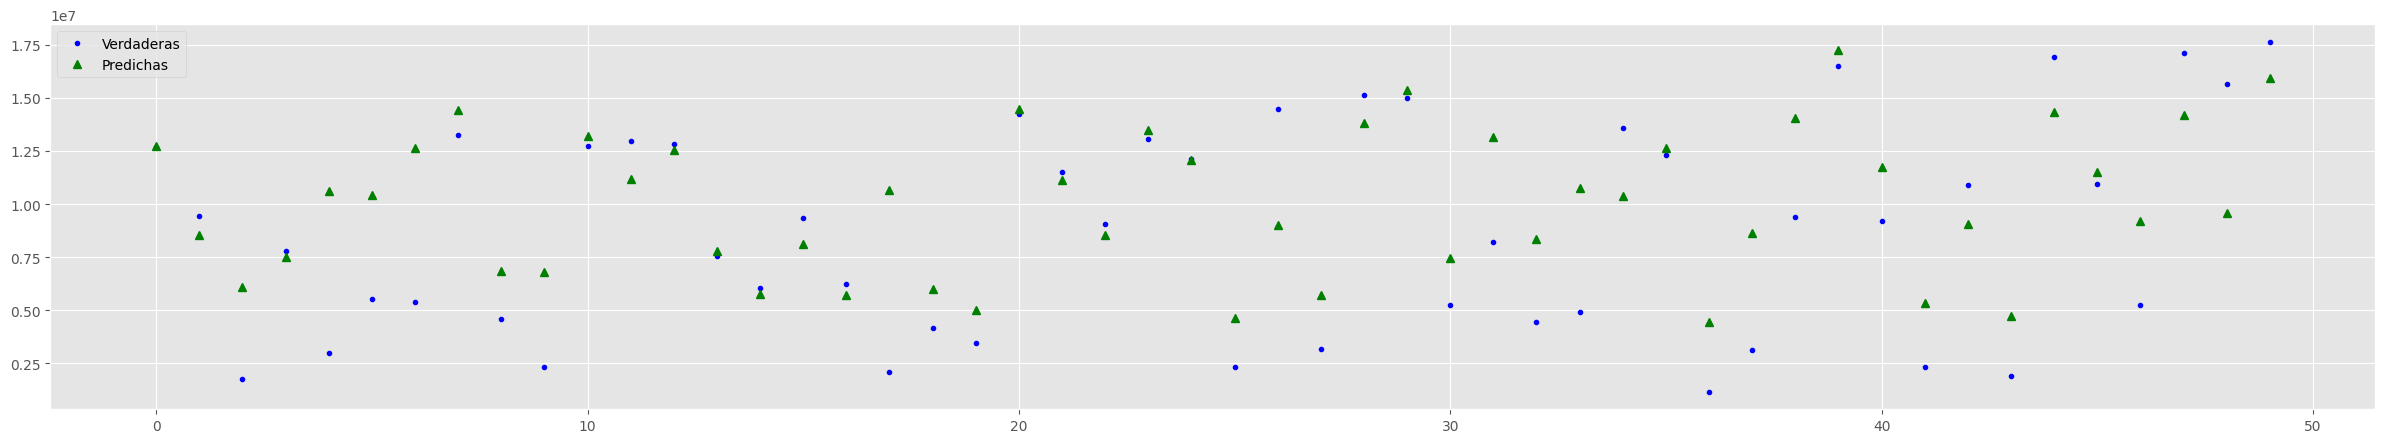

In [79]:
# Creación del modelo
# ==============================================================================
regr_rf = RandomForestRegressor(
            n_estimators = 10,
            max_depth    = None,
            max_features = 1.0,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 29
         )

# Entrenamiento del modelo
# ==============================================================================
t_inicio = time.time()

regr_rf.fit(X_train_pca, Y_train)
y_test_pred = regr_rf.predict(X_test_pca)

t_fin = time.time() #FIN EJECUCIÓN
t_ejecución = t_fin - t_inicio #CALCULAMOS EL TIEMPO TOTAL DE EJECUCIÓN
print(f"El tiempo de ejecución de este Random Forest es: {t_ejecución}")

rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)) #CALCULAMOS EL RMSE
print(f"El RMSE de este Random Forest es: {rmse}")

mae = metrics.mean_absolute_error(Y_test, y_test_pred) #CALCULAMOS EL MAE
print(f"El MAE de este Random Forest es: {mae}")


print(f"Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: ")
print(np.hstack((y_test_pred[:5,np.newaxis], Y_test[:5,np.newaxis])))
print("==============================================================")
pintaResultados(regr_rf,50)

### AJUSTE DE HIPERPARÁMETROS

#### NÚMERO DE ÁRBOLES

In [80]:
'''
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 20)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                max_depth    = None,
                max_features = 1.0,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 29
             )
    modelo.fit(X_train_pca, Y_train)
    train_scores.append(modelo.score(X_train_pca, Y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
ax.set_ylim([0.7,None])
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")
'''

'\n# Validación empleando el Out-of-Bag error\n# ==============================================================================\ntrain_scores = []\noob_scores   = []\n\n# Valores evaluados\nestimator_range = range(1, 150, 20)\n\n# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error\n# de entrenamiento y de Out-of-Bag.\nfor n_estimators in estimator_range:\n    modelo = RandomForestRegressor(\n                n_estimators = n_estimators,\n                max_depth    = None,\n                max_features = 1.0,\n                oob_score    = True,\n                n_jobs       = -1,\n                random_state = 29\n             )\n    modelo.fit(X_train_pca, Y_train)\n    train_scores.append(modelo.score(X_train_pca, Y_train))\n    oob_scores.append(modelo.oob_score_)\n    \n# Gráfico con la evolución de los errores\nfig, ax = plt.subplots(figsize=(6, 3.84))\nax.plot(estimator_range, train_scores, label="train scores")\nax.plot(estimator_range, oob_scores

* El código está comentado por el tiempo que tarda en ejecutarse pero para ver de donde obtenemos el valor óptimo.
* El valor óptimo de n_estimators es 141

#### NÚMERO DE PREDICTORES

In [81]:
'''
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de Out-of-Bag.
for max_features in max_features_range:
    modelo = RandomForestRegressor(
                n_estimators = 141,
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 29
             )
    modelo.fit(X_train_pca, Y_train)
    train_scores.append(modelo.score(X_train_pca, Y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolución del out-of-bag-error vs número de predictores")
plt.legend(); 
print(f"Valor óptimo de max_features: {max_features_range[np.argmax(oob_scores)]}")
'''

'\n# Validación empleando el Out-of-Bag error\n# ==============================================================================\ntrain_scores = []\noob_scores   = []\n\n# Valores evaluados\nmax_features_range = range(1, X_train.shape[1] + 1, 1)\n\n# Bucle para entrenar un modelo con cada valor de max_features y extraer su error\n# de entrenamiento y de Out-of-Bag.\nfor max_features in max_features_range:\n    modelo = RandomForestRegressor(\n                n_estimators = 141,\n                max_depth    = None,\n                max_features = max_features,\n                oob_score    = True,\n                n_jobs       = -1,\n                random_state = 29\n             )\n    modelo.fit(X_train_pca, Y_train)\n    train_scores.append(modelo.score(X_train_pca, Y_train))\n    oob_scores.append(modelo.oob_score_)\n    \n# Gráfico con la evolución de los errores\nfig, ax = plt.subplots(figsize=(6, 3.84))\nax.plot(max_features_range, train_scores, label="train scores")\nax.plot(ma

* El código está comentado por el tiempo que tarda en ejecutarse pero para ver de donde obtenemos el valor óptimo.
* El valor óptimo de max_features es 25

#### CON LOS MEJORES PARÁMETROS

El tiempo de ejecución de este Random Forest es: 9.350984811782837
El RMSE de este Random Forest es: 3338618.2112759966
El MAE de este Random Forest es: 2497806.8259982513
Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: 
[[12396804.25531915 12672900.        ]
 [10345044.68085106  9417900.        ]
 [ 5731448.93617021  1773000.        ]
 [ 7338974.46808511  7792200.        ]
 [ 9481468.08510638  2965500.        ]]


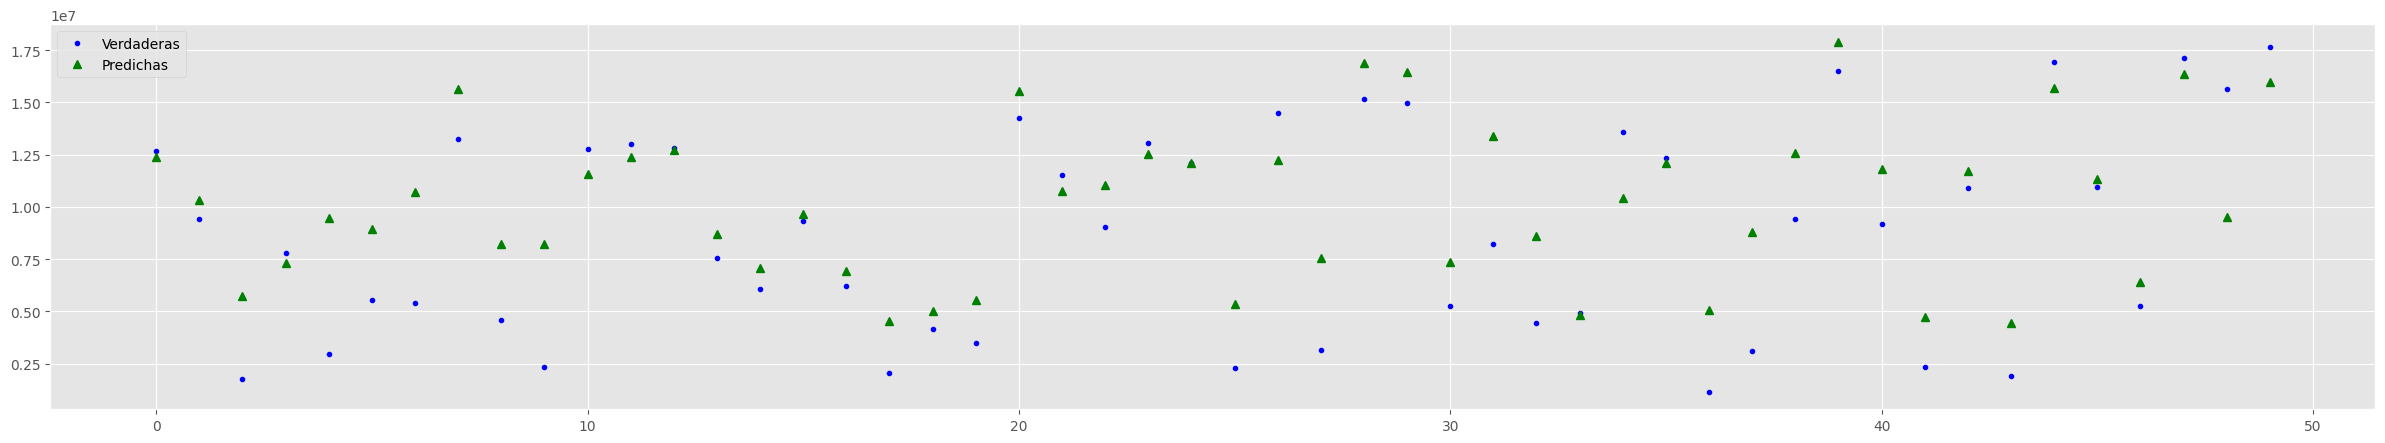

In [82]:
# Creación del modelo
# ==============================================================================
regr_rf = RandomForestRegressor(
            n_estimators = 141,
            max_depth    = None,
            max_features = 25,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 29
         )

# Entrenamiento del modelo
# ==============================================================================
t_inicio = time.time()

regr_rf.fit(X_train_pca, Y_train)
y_test_pred = regr_rf.predict(X_test_pca)

t_fin = time.time() #FIN EJECUCIÓN
t_ejecución = t_fin - t_inicio #CALCULAMOS EL TIEMPO TOTAL DE EJECUCIÓN
print(f"El tiempo de ejecución de este Random Forest es: {t_ejecución}")

rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)) #CALCULAMOS EL RMSE
print(f"El RMSE de este Random Forest es: {rmse}")

mae = metrics.mean_absolute_error(Y_test, y_test_pred) #CALCULAMOS EL MAE
print(f"El MAE de este Random Forest es: {mae}")


print(f"Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: ")
print(np.hstack((y_test_pred[:5,np.newaxis], Y_test[:5,np.newaxis])))
print("==============================================================")
pintaResultados(regr_rf,50)

### GRADIENT BOOSTING

#### EVALUACIÓN CON HIPERPARÁMETROS POR OMISIÓN

El tiempo de ejecución de este Random Forest con GRADIENT BOOSTING es: 0.987675666809082
El RMSE de este Random Forest con GRADIENT BOOSTING es: 3337648.342189177
El MAE de este Random Forest es: 2403045.3309863014
Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: 
[[13373322.45962522 12672900.        ]
 [10947344.99176161  9417900.        ]
 [ 4188034.56648351  1773000.        ]
 [ 5400946.0890969   7792200.        ]
 [ 7993207.53584299  2965500.        ]]


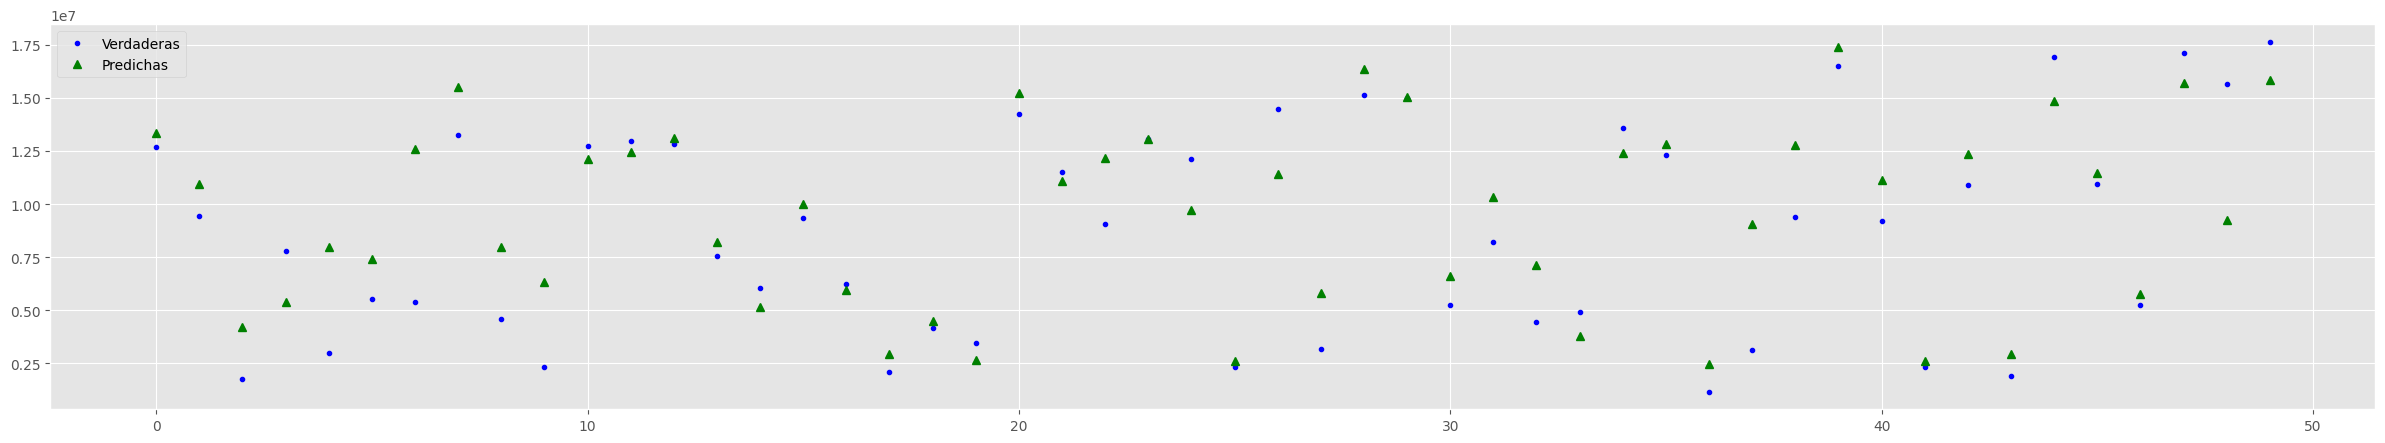

In [83]:


# Creación del modelo
# ==============================================================================
regr_gb = HistGradientBoostingRegressor(
            random_state = 29
         )

# Entrenamiento del modelo
# ==============================================================================
np.random.seed(29)
t_inicio = time.time()
regr_gb.fit(X_train_pca, Y_train)
y_test_pred = regr_gb.predict(X_test_pca)

t_fin = time.time() #FIN EJECUCIÓN
t_ejecución = t_fin - t_inicio #CALCULAMOS EL TIEMPO TOTAL DE EJECUCIÓN
print(f"El tiempo de ejecución de este Random Forest con GRADIENT BOOSTING es: {t_ejecución}")

rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)) #CALCULAMOS EL RMSE
print(f"El RMSE de este Random Forest con GRADIENT BOOSTING es: {rmse}")

mae = metrics.mean_absolute_error(Y_test, y_test_pred) #CALCULAMOS EL MAE
print(f"El MAE de este Random Forest es: {mae}")


print(f"Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: ")
print(np.hstack((y_test_pred[:5,np.newaxis], Y_test[:5,np.newaxis])))
print("==============================================================")
pintaResultados(regr_gb,50)

#### AJUSTE DE HIPERPARÁMETROS

##### RANDOMIZED SEARCH

Fitting 1 folds for each of 25 candidates, totalling 25 fits
El tiempo de ejecución de este Random Forest con GRADIENT BOOSTING y Random Search es: 82.71243834495544
El RMSE de este Random Forest con GRADIENT BOOSTING y Random Search es: 3348516.2228244464
El MAE de este Random Forest con GRADIENT BOOSTING y Random Search es: 2444210.836041299
Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: 
[[14048703.17785138 12672900.        ]
 [12052667.58879402  9417900.        ]
 [ 4922040.79305905  1773000.        ]
 [ 5184018.44554415  7792200.        ]
 [ 8662991.75798344  2965500.        ]]
Los mejores parametros de esta regresión son: {'max_leaf_nodes': 10, 'max_depth': 10, 'learning_rate': 0.01, 'l2_regularization': 1}


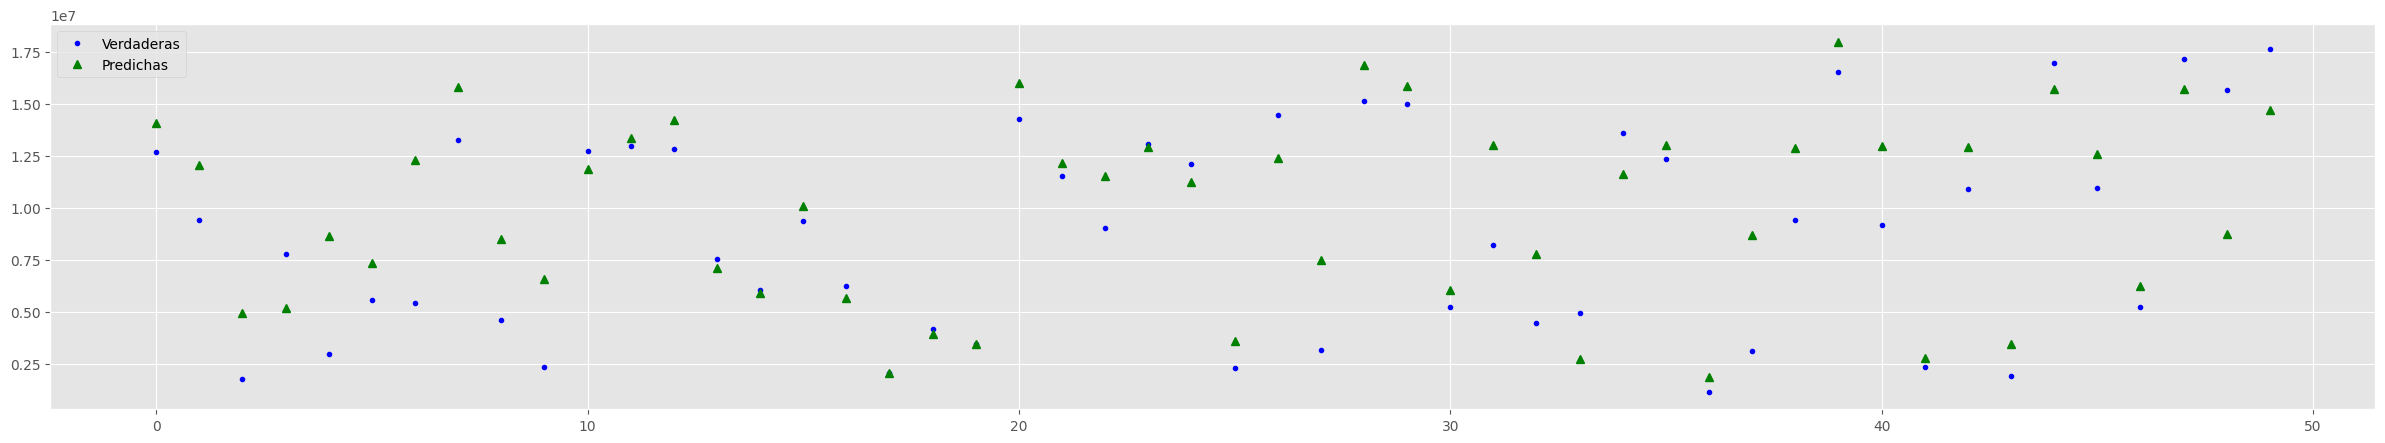

In [84]:
param_grid = {'max_depth'         : [None, 1, 3, 5, 10, 20],
              'learning_rate'     : [0.001, 0.01, 0.1, 0.2],
              'l2_regularization' : [0, 1],
              'max_leaf_nodes': [3, 10, 30]
             }
t_inicio = time.time() 
validacion = PredefinedSplit(test_fold)
budget = 25
# Cross-validation (3-fold) para la búsqueda de hiper-parámetros
regr = RandomizedSearchCV (estimator  = HistGradientBoostingRegressor(max_iter            = 1000,
                                                                      random_state        = 29,
                                                                      # Activación de la parada temprana
                                                                      validation_fraction = 0.1,
                                                                      n_iter_no_change    = 5,
                                                                      tol                 = 0.0001),
                           param_distributions = param_grid,
                           scoring='neg_mean_squared_error',
                           cv=validacion,
                           refit=True,
                           n_jobs=-1,
                           verbose=1,
                           n_iter=budget,
                           return_train_score=True)

np.random.seed(29)
regr.fit(X=X_train_pca, y=Y_train)
y_test_pred = regr.predict(X_test_pca)

t_fin = time.time() #FIN EJECUCIÓN
t_ejecución = t_fin - t_inicio #CALCULAMOS EL TIEMPO TOTAL DE EJECUCIÓN
print(f"El tiempo de ejecución de este Random Forest con GRADIENT BOOSTING y Random Search es: {t_ejecución}")

rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)) #CALCULAMOS EL RMSE
print(f"El RMSE de este Random Forest con GRADIENT BOOSTING y Random Search es: {rmse}")

mae = metrics.mean_absolute_error(Y_test, y_test_pred) #CALCULAMOS EL MAE
print(f"El MAE de este Random Forest con GRADIENT BOOSTING y Random Search es: {mae}")


print(f"Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: ")
print(np.hstack((y_test_pred[:5,np.newaxis], Y_test[:5,np.newaxis])))
print("==============================================================")

pintaResultados(regr,50)


print(f"Los mejores parametros de esta regresión son: {regr.best_params_}")


##### XGBoost

In [85]:
'''
!pip install xgboost
from xgboost import XGBRegressor
import multiprocessing


# espacio de búsqueda
param_grid = {'max_depth'        : [None, 1, 3, 5, 10, 20],
              'subsample'        : [0.5, 1],
              'learning_rate'    : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              'n_estimators'     : sp_randint(50, 500)
              }

# Búsqueda por random search con validación cruzada
# ==============================================================================
t_inicio = time.time() 
validacion = PredefinedSplit(test_fold)
budget = 40
grid = RandomizedSearchCV(
    estimator  = XGBRegressor(random_state = 29),
    param_distributions= param_grid,
    scoring    = 'neg_root_mean_squared_error',
    n_jobs     = multiprocessing.cpu_count() - 1,
    cv         = validacion,
    refit      = True,
    verbose    = 0,
    n_iter=budget
)

grid.fit(X = X_train_pca, y = Y_train)
y_test_pred = grid.predict(X_test_pca)

t_fin = time.time() #FIN EJECUCIÓN
t_ejecución = t_fin - t_inicio #CALCULAMOS EL TIEMPO TOTAL DE EJECUCIÓN
print(f"El tiempo de ejecución de este Random Forest con GRADIENT BOOSTING y XGBoost es: {t_ejecución}")

rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)) #CALCULAMOS EL RMSE
print(f"El RMSE de este Random Forest con GRADIENT BOOSTING es: {rmse}")

mae = metrics.mean_absolute_error(Y_test, y_test_pred) #CALCULAMOS EL MAE
print(f"El MAE de este Random Forest es: {mae}")


print(f"Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: ")
print(np.hstack((y_test_pred[:5,np.newaxis], Y_test[:5,np.newaxis])))
print("==============================================================")

pintaResultados(regr,50)

print(f"Los mejores parametros de esta regresión son: {grid.best_params_}")
'''

'\n!pip install xgboost\nfrom xgboost import XGBRegressor\nimport multiprocessing\n\n\n# espacio de búsqueda\nparam_grid = {\'max_depth\'        : [None, 1, 3, 5, 10, 20],\n              \'subsample\'        : [0.5, 1],\n              \'learning_rate\'    : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],\n              \'n_estimators\'     : sp_randint(50, 500)\n              }\n\n# Búsqueda por random search con validación cruzada\n# ==============================================================================\nt_inicio = time.time() \nvalidacion = PredefinedSplit(test_fold)\nbudget = 40\ngrid = RandomizedSearchCV(\n    estimator  = XGBRegressor(random_state = 29),\n    param_distributions= param_grid,\n    scoring    = \'neg_root_mean_squared_error\',\n    n_jobs     = multiprocessing.cpu_count() - 1,\n    cv         = validacion,\n    refit      = True,\n    verbose    = 0,\n    n_iter=budget\n)\n\ngrid.fit(X = X_train_pca, y = Y_train)\ny_test_pred = grid.predict(X_test_pca)\n\nt_fin = t

##### LightGBM

In [86]:
'''
!pip install lightgbm
#!conda install -c conda-forge lightgbm
from lightgbm import LGBMRegressor
import multiprocessing

# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators'     : sp_randint(100, 5000),
              'max_depth'        : [-1, 1, 3, 5, 10, 20],
              'subsample'        : [0.5, 1],
              'learning_rate'    : [0.001, 0.01, 0.1],
              'boosting_type'    : ['gbdt']
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
t_inicio = time.time() 
validacion = PredefinedSplit(test_fold)
budget = 40
grid = RandomizedSearchCV(
        estimator  = LGBMRegressor(random_state=29),
        param_distributions = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = validacion, 
        refit      = True,
        verbose    = 0,
        return_train_score = True,
        n_iter=budget
       )

grid.fit(X = X_train_pca, y = Y_train)
y_test_pred = grid.predict(X_test_pca)

t_fin = time.time() #FIN EJECUCIÓN
t_ejecución = t_fin - t_inicio #CALCULAMOS EL TIEMPO TOTAL DE EJECUCIÓN
print(f"El tiempo de ejecución de este Random Forest con GRADIENT BOOSTING y LightGBM es: {t_ejecución}")

rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)) #CALCULAMOS EL RMSE
print(f"El RMSE de este Random Forest con GRADIENT BOOSTING y LightGBM es: {rmse}")

mae = metrics.mean_absolute_error(Y_test, y_test_pred) #CALCULAMOS EL MAE
print(f"El MAE de este Random Forest con GRADIENT BOOSTING y LightGBM es: {mae}")


print(f"Ahora vamos a ver la diferencia entre el valor real y la predicción del modelo: ")
print(np.hstack((y_test_pred[:5,np.newaxis], Y_test[:5,np.newaxis])))
print("==============================================================")

pintaResultados(regr,50)

print(f"Los mejores parametros de esta regresión son: {grid.best_params_}")
'''

'\n!pip install lightgbm\n#!conda install -c conda-forge lightgbm\nfrom lightgbm import LGBMRegressor\nimport multiprocessing\n\n# Grid de hiperparámetros evaluados\n# ==============================================================================\nparam_grid = {\'n_estimators\'     : sp_randint(100, 5000),\n              \'max_depth\'        : [-1, 1, 3, 5, 10, 20],\n              \'subsample\'        : [0.5, 1],\n              \'learning_rate\'    : [0.001, 0.01, 0.1],\n              \'boosting_type\'    : [\'gbdt\']\n             }\n\n# Búsqueda por grid search con validación cruzada\n# ==============================================================================\nt_inicio = time.time() \nvalidacion = PredefinedSplit(test_fold)\nbudget = 40\ngrid = RandomizedSearchCV(\n        estimator  = LGBMRegressor(random_state=29),\n        param_distributions = param_grid,\n        scoring    = \'neg_root_mean_squared_error\',\n        n_jobs     = multiprocessing.cpu_count() - 1,\n        cv

### CONCLUSIONES RANDOM FOREST

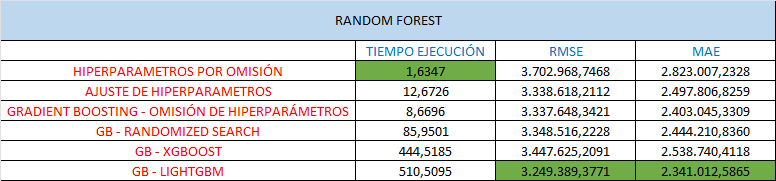
* Observando estos resultados, podemos concluir que el que mejor valores de errores consigue es el de LightGBM pero con un tiempo de ejecución demasiado alto, por lo que buscando un equilibrio entre tiempo de ejecución y error, hemos escogido el modelo con Gradient Boosting y sin ajuste de hipeparámetros como mejor modelo.

## 8.3 CONCLUSIONES MÉTODOS AVANZADOS
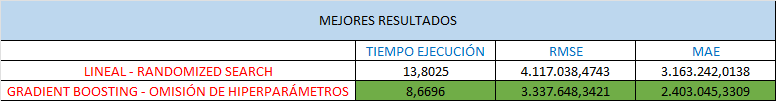
* Viendo los resultados podemos concluir que de los métodos avanzados, el que mejor rendimiento nos ha dado es el de Random Forest con Gradient Boosting.



## 9. ELECCIÓN MEJOR MODELO
* Para construir el modelo final vamos a comparar el mejor modelo de los métodos básicos y el mejor de los métodos avanzados. 
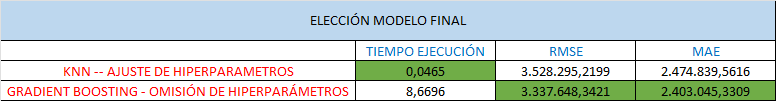
* Viendo esta tabla podemos concluir que el modelo que se ejecuta más rápido es el de KNN pero el Random Forest obtiene mejores valores para los errores.
* Viendo la diferencia en las tasas de errores que es pequeña en relación a los valores de los datos, hemos concluido que el mejor modelo y el que vamos a utilizar para la construcción del modelo final es el de KNN con ajuste de hiperparámetros.

# 10. MODELO FINAL
Escogeremos el mejor método de los evaluados anteriormente y entrenaremos este modelo con el conjunto de test. Después, con este modelo final, realizaremos predicciones sobre el conjunto de datos de competición.

In [87]:
modelo_final_knn = KNeighborsRegressor(n_neighbors=50)
modelo_final_knn.fit(X_train, Y_train)
joblib.dump(modelo_final_knn, 'modelo_final.pkl')

['modelo_final.pkl']

# 11. CONCLUSIONES GENERALES DE LA PRÁCTICA

* Tras haber completado esta práctica podemos decir que nos ha servido en gran medida para conocer y trabajar con diferentes modelo de Machine Learning y ver como trabaja cada uno y como realizar un análisis completo de estos modelos. 
* A su vez debido al punto en el que nos encontramos en la carrera, nos ha servido para darnos cuenta del potencial que tienen este tipo de análisis y tenerlo para un futuro laboral e incluso realizar un trabajo similar en el TFG realizando predicciones sobre algún tema.
* También consideramos que dado que la práctica consiste en aprender a trabajar y entender los distintos modelos, el hecho de que se nos de la mayoría del código es una gran ayuda al igual que los tutoriales.